#**COURS INTERACTIF: Amplification extrême des dégradés avec XGBoost**

+ *4 heures*
+ *16 Vidéos*
+ *49 Exercices*
+ *44 879 Participants*
+ *3 750 XP*


<img src="https://www.datacamp.com/statement-of-accomplishment/badge/course/5a99ef71859d44d8aaa597b3dd735c22e3ce82d1.png"/>

###**Description du cours**

+ ***Connaissez-vous les bases de l'apprentissage supervisé et souhaitez-vous utiliser des modèles de pointe sur des ensembles de données du monde réel ? Le gradient boosting est actuellement l'une des techniques les plus populaires pour la modélisation efficace d'ensembles de données tabulaires de toutes tailles. XGboost est une implémentation très rapide et évolutive de gradient boosting, avec des modèles utilisant XGBoost remportant régulièrement des concours de science des données en ligne et étant utilisés à grande échelle dans différents secteurs. Dans ce cours, vous apprendrez à utiliser cette puissante bibliothèque aux côtés de pandas et de scikit-learn pour créer et ajuster des modèles d'apprentissage supervisé. Vous travaillerez avec des ensembles de données du monde réel pour résoudre des problèmes de classification et de régression.***

####**1) Classement avec XGBoost**

+ ***Ce chapitre vous présentera l'idée fondamentale derrière XGBoost : les apprenants boostés. Une fois que vous aurez compris le fonctionnement de XGBoost, vous l'appliquerez pour résoudre un problème de classification courant rencontré dans l'industrie : prédire si un client cessera d'être un client à un moment donné dans le futur.***

|OBJECTIFS|
|---------|
Bienvenue au cours !
Lequel de ces problèmes est un problème de classification ?
Lequel de ces problèmes est un problème de classification binaire ?
Présentation de XGBoost
XGBoost : Ajuster/Prédire
Qu'est-ce qu'un arbre de décision ?
Arbres de décision
Qu'est-ce que le boost ?
Précision de mesure
Mesure de l'AUC
Quand dois-je utiliser XGBoost ?
Utiliser XGBoost

####**2) Régression avec XGBoost**

+ ***Après un bref examen de la régression supervisée, vous appliquerez XGBoost à la tâche de régression consistant à prévoir les prix des logements à Ames, Iowa. Vous en apprendrez plus sur les deux types d'apprenants de base que XGboost peut utiliser comme apprenants faibles et examinerez comment évaluer la qualité de vos modèles de régression.***

|OBJECTIFS|
|---------|
Examen de régression
Lequel de ces problèmes est un problème de régression ?
Fonctions objectives (de perte) et apprenants de base
Arbres de décision en tant qu'apprenants de base
Apprenants de base linéaire
Évaluation de la qualité du modèle
Régularisation et apprenants de base dans XGBoost
Utilisation de la régularisation dans XGBoost
Visualisation des arbres XGBoost individuels
Visualisation de l'importance des fonctionnalités : quelles fonctionnalités sont les plus importantes dans mon jeu de données

####**3) Réglage fin de votre modèle XGBoost**

+ ***Ce chapitre vous apprendra comment rendre vos modèles XGBoost aussi performants que possible. Vous découvrirez la variété de paramètres qui peuvent être ajustés pour modifier le comportement de XGBoost et comment les régler efficacement afin que vous puissiez optimiser les performances de vos modèles.***

|OBJECTIFS|
|---------|
Pourquoi régler votre modèle ?
Quand régler votre modèle est-il une mauvaise idée ?
Réglage du nombre de tours de boost
Sélection automatisée du cycle de boosting à l'aide de early_stopping
Présentation des hyperparamètres de XGBoost
Réglage eta
Réglage max_depth
Réglage de colsample_bytree
Examen de la recherche par grille et de la recherche aléatoire
Recherche de grille avec XGBoost
Recherche aléatoire avec XGBoost
Limites de la recherche par grille et de la recherche aléatoire
Quand devriez-vous utiliser la recherche par grille et la recherche aléatoire ?

####**4) Utilisation de XGBoost dans les pipelines**

+ ***Faites passer vos compétences XGBoost au niveau supérieur en incorporant vos modèles dans deux pipelines d'apprentissage automatique de bout en bout. Vous apprendrez à régler efficacement les hyperparamètres XGBoost les plus importants au sein d'un pipeline et découvrirez des techniques de prétraitement plus avancées.***

|OBJECTIFS|
|---------|
Examen des pipelines à l'aide de sklearn
L'analyse exploratoire des données
Encodage des colonnes catégorielles I : LabelEncoder
Encodage des colonnes catégorielles II : OneHotEncoder
Encodage des colonnes catégorielles III : DictVectorizer
Prétraitement dans un pipeline
Intégrer XGBoost dans les pipelines
Validation croisée de votre modèle XGBoost
Étude de cas sur la maladie rénale I : Imputer catégorique
Étude de cas II sur la maladie rénale : Feature Union
Étude de cas III sur la maladie rénale : pipeline complet
Réglage des hyperparamètres XGBoost
Rassembler le tout
Dernières pensées


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split

plt.rcParams['figure.figsize'] = (15, 12)


####**1. Bienvenue au cours !**

+ ***Bonjour, je m'appelle Sergey Fogelson et je suis l'instructeur du cours de Datacamp sur Gradient Boosted Trees With XGBoost. Je suis un scientifique des données travaillant dans l'industrie des médias et j'ai beaucoup utilisé XGBoost sur une variété de problèmes d'apprentissage automatique. J'ai créé ce cours avec DataCamp pour aider les autres à comprendre rapidement comment utiliser cette implémentation très populaire de gradient boosting. Commençons.***

####**2. Avant d'arriver à XGBoost...***

+ ***Afin de comprendre XGBoost, nous devons maîtriser les sujets plus larges de la classification supervisée, des arbres de décision et du boosting, que nous aborderons tout au long de ce chapitre. Pour commencer, rappelons brièvement ce que***

####**3. Apprentissage supervisé**

+ ***l'apprentissage supervisé et les types de problèmes auxquels ses méthodes peuvent être appliquées. À la base, l'apprentissage supervisé, qui est le type de problèmes d'apprentissage auxquels XGBoost peut être appliqué, repose sur des données étiquetées. Autrement dit, vous avez une certaine compréhension du comportement passé du problème que vous essayez de résoudre ou de ce que vous essayez de prédire.***

####**4. Exemple d'apprentissage supervisé**

+ ***Par exemple, évaluer si une image spécifique contient le visage d'une personne est un problème de classification. Ici, les données d'apprentissage sont des images converties en vecteurs de valeurs de pixels, et les étiquettes sont soit 1 lorsque l'image contient un visage, soit 0 lorsque l'image ne contient pas de visage. Compte tenu de cela, il existe deux types de problèmes d'apprentissage supervisé qui représentent la grande majorité des cas d'utilisation : les problèmes de classification et les problèmes de régression. Nous ne parlerons ici que des problèmes de classification et laisserons la régression au chapitre 2.***

####**5. Apprentissage supervisé : Classification**

+ ***Les problèmes de classification impliquent de prédire des résultats binaires ou multi-classes.***

####**6. Exemple de classification binaire**

+ ***Par exemple, prédire si une personne achètera un forfait d'assurance compte tenu d'un devis est un problème d'apprentissage supervisé binaire,***

####**7. Exemple de classification multi-classes**

+ ***et prédire si une image contient l'une de plusieurs espèces d'oiseaux est un problème d'apprentissage supervisé multi-classes. Lorsqu'il s'agit de problèmes d'apprentissage supervisé binaire,***

####**8. AUC : Métrique pour les modèles de classification binaire**

+ ***l'AUC, ou Area Under the Receiver Operating Characteristic Curve, est la mesure d'évaluation la plus polyvalente et la plus courante utilisée pour juger de la qualité d'un modèle de classification binaire. Il s'agit simplement de la probabilité qu'un point de données positif choisi au hasard ait un rang supérieur à un point de données négatif choisi au hasard pour votre problème d'apprentissage. Ainsi, une AUC plus élevée signifie un modèle plus sensible et plus performant. Lorsque l'on traite des problèmes de classification multi-classes,***

####**9. Score de précision et matrice de confusion**

+ ***il est courant d'utiliser le score de précision (plus il est élevé, mieux c'est) et de regarder la matrice de confusion globale pour évaluer la qualité d'un modèle.***

####**10. Révision**

+ ***Certains algorithmes courants pour les problèmes de classification incluent la régression logistique et les arbres de décision. Si vous souhaitez un examen plus approfondi, consultez le cours d'introduction de DataCamp sur l'apprentissage supervisé.***

####**11. Autres considérations d'apprentissage supervisé**

+ ***Tous les problèmes d'apprentissage supervisé, y compris les problèmes de classification, nécessitent que les données soient structurées sous la forme d'un tableau de vecteurs de caractéristiques, où les caractéristiques elles-mêmes (également appelées attributs ou prédicteurs) sont soit numériques, soit catégorielles. En outre, il arrive généralement que les caractéristiques numériques soient mises à l'échelle pour faciliter l'interprétation des caractéristiques ou pour garantir que le modèle peut être formé correctement (par exemple, la mise à l'échelle des caractéristiques numériques est essentielle pour garantir des modèles de machines à vecteurs de support correctement formés). Les caractéristiques catégorielles sont également presque toujours codées avant d'appliquer des algorithmes d'apprentissage supervisé, le plus souvent en utilisant un codage à chaud. Enfin, d'autres types de problèmes d'apprentissage supervisé existent, je vais donc les mentionner ici brièvement.***

####**12. Classement**

+ ***Les problèmes de classement impliquent de prédire un ordre sur un ensemble de choix (comme les suggestions de recherche Google),***

####**13. Recommandation**

+ ***et les problèmes de recommandation impliquent de recommander un article ou un ensemble d'articles à un utilisateur en fonction de son historique de consommation et de son profil (comme Netflix).***

####**14. Entraînons-nous !**

+ ***Maintenant qu'on vous a rappelé les bases des problèmes de classification, mettons-nous au travail !***

###**EXERCICES**

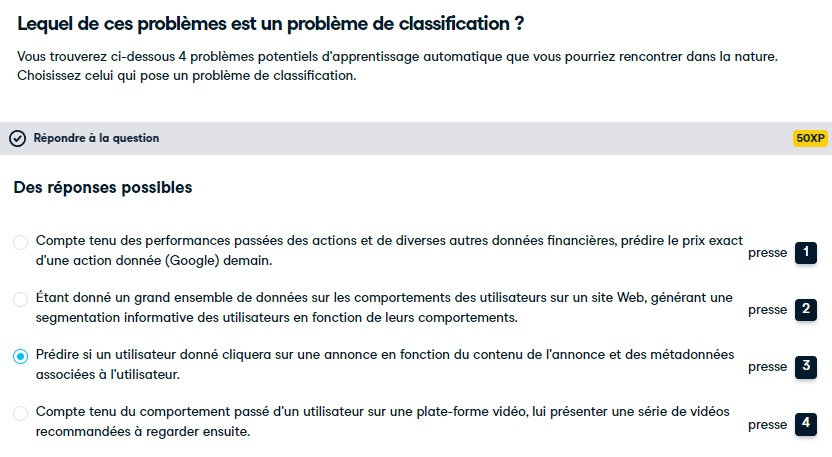

***Bien joué! Il s'agit bien d'un problème de classement.***

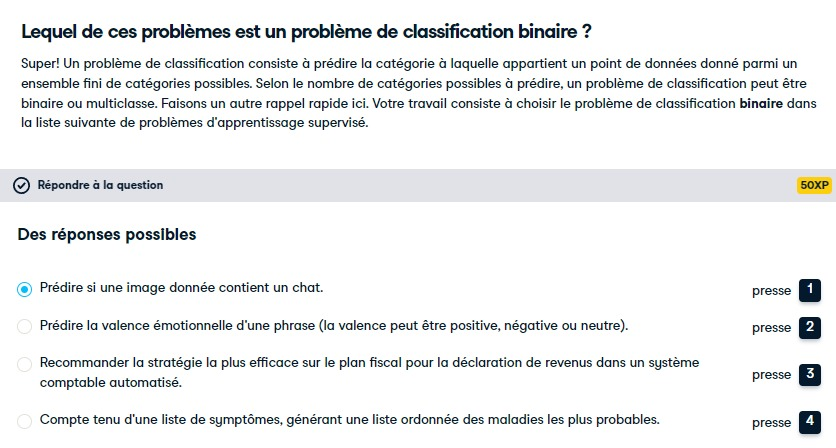

***Correct! Un problème de classification binaire consiste à choisir entre 2 choix.***

####**XGBoost : Ajuster/Prédire**

+ ***Il est temps de créer votre premier modèle XGBoost ! Comme Sergey vous l'a montré dans la vidéo, vous pouvez utiliser le paradigme scikit-learn .fit() que .predict()vous connaissez déjà pour construire vos modèles XGBoost, car la xgboostbibliothèque possède une API compatible scikit-learn !***

+ ***Ici, vous travaillerez avec des données de désabonnement. Cet ensemble de données contient des données imaginaires d'une application de covoiturage avec les comportements des utilisateurs au cours de leur premier mois d'utilisation de l'application dans un ensemble de villes imaginaires, ainsi que s'ils ont utilisé le service 5 mois après leur inscription. Il a été pré-chargé pour vous dans un DataFrame appelé churn_data- explorez-le dans le Shell !***

+ ***Votre objectif est d'utiliser les données du premier mois pour prédire si les utilisateurs de l'application resteront des utilisateurs du service au bout de 5 mois. Il s'agit d'une configuration typique pour un problème de prédiction de désabonnement. Pour ce faire, vous allez diviser les données en ensembles d'apprentissage et de test, ajuster un petit xgboostmodèle sur l'ensemble d'apprentissage et évaluer ses performances sur l'ensemble de test en calculant sa précision.***

+ ***pandas et numpy ont été importés en tant que pdet np, et train_test_split ont été importés de sklearn.model_selection. De plus, les tableaux des entités et de la cible ont été créés en tant que $X$ et $y$.***

####**Instructions**

+ Importer xgboost au format xgb.
+ Créez des ensembles d'entraînement et de test de sorte que 20 % des données soient utilisées pour les tests.
+ Utilisez un random_statede 123.
+ Instanciez un XGBoostClassifieras en xg_cl utilisant xgb.XGBClassifier().
+ Spécifiez n_estimators être 10 des estimateurs et un objectivede 'binary:logistic'.
+ Ne vous souciez pas encore de ce que cela signifie, vous en apprendrez plus sur ces paramètres plus tard dans ce cours.
+ Adapter xg_cl à l'ensemble d'entraînement (X_train, y_train)en utilisant la méthode .fit().

+ Prédisez les étiquettes de l'ensemble de test ( X_test) à l'aide de la méthode .predict() et cliquez sur "Soumettre la réponse" pour imprimer la précision.

In [10]:
churn_data = pd.read_csv('churn_data.csv')

In [11]:
# Create arrays for the features and the target: X, y
X, y = churn_data.iloc[:,:-1], churn_data.iloc[:,-1]

# Create the training and test sets
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=123)

# Instantiate the XGBClassifier: xg_cl
xg_cl = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10, seed=123)

# Fit the classifier to the training set
xg_cl.fit(X_train,y_train)

# Predict the labels of the test set: preds
preds = xg_cl.predict(X_test)

# Compute the accuracy: accuracy
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))

accuracy: 0.758200


***Bien joué! Votre modèle a une précision d'environ 74 %. Au chapitre 3, vous apprendrez comment affiner vos modèles XGBoost. Pour l'instant, rafraîchissons nos mémoires sur le fonctionnement des arbres de décision. Rendez-vous dans la prochaine vidéo !***

####**1. Qu'est-ce qu'un arbre de décision ?**

+ ***Étant donné que XGBoost est généralement utilisé avec des arbres comme apprenants de base, nous devons comprendre ce qu'est un arbre de décision individuel et comment il fonctionne.***

####**2. Visualiser un arbre de décision**

+ ***Voici un exemple d'arbre de décision. Comme vous pouvez le voir, il y a une seule question qui est posée à chaque nœud de décision, et seulement 2 choix possibles, tout en bas de chaque arbre de décision, il y a une seule décision possible. Dans cet exemple d'arbre de décision pour l'achat ou non d'un véhicule, la première question que vous posez est de savoir s'il a été testé sur route. Si ce n'est pas le cas, vous décidez immédiatement de ne pas acheter, sinon, vous continuez à vous poser des questions, telles que le kilométrage du véhicule et si son âge est ancien ou récent. Au fond, chaque décision possible mènera éventuellement à un choix, certains prenant beaucoup moins de questions pour arriver à ces choix que d'autres.***

  + *https://www.ibm.com/support/knowledgecenter/en/SS3RA7_15.0.0/ com.ibm.spss.modeler.help/nodes_treebuilding.htm*

####**3. Arbres de décision en tant qu'apprenants de base**

+ ***Le concept d'apprenant de base sera couvert plus en détail plus tard, mais pour l'instant, pensez simplement à n'importe quel algorithme d'apprentissage individuel dans un algorithme d'ensemble en tant qu'apprenant de base. Ceci est important car XGBoost lui-même est une méthode d'apprentissage d'ensemble en ce sens qu'il utilise les sorties de nombreux modèles pour une prédiction finale. Quoi qu'il en soit, comme vous l'avez vu dans la diapositive précédente, un arbre de décision est une méthode d'apprentissage qui implique un graphique en forme d'arbre pour modéliser un choix continu ou catégorique compte tenu de certaines données. Il est composé d'une série de décisions binaires (oui/non ou vrai/faux) qui, lorsqu'elles sont répondues successivement, donnent finalement une prédiction sur les données disponibles (ces prédictions se produisent aux feuilles de l'arbre).***

####**4. Arbres de décision et CART**

+ ***Les arbres de décision sont construits de manière itérative (c'est-à-dire une décision binaire à la fois) jusqu'à ce qu'un certain critère d'arrêt soit satisfait (la profondeur de l'arbre atteint une valeur maximale prédéfinie, par exemple). Pendant la construction, l'arbre est construit une division à la fois, et la façon dont une division est sélectionnée (c'est-à-dire, quelle entité diviser et où dans la plage de valeurs de l'entité à diviser) peut varier, mais implique de choisir un point de division qui sépare mieux les valeurs cibles (place chaque catégorie cible dans des compartiments qui sont de plus en plus dominés par une seule catégorie) jusqu'à ce que toutes (ou presque toutes) les valeurs d'une répartition donnée soient exclusivement d'une catégorie ou d'une autre. En utilisant ce processus, chaque feuille de l'arbre de décision aura une seule catégorie dans la majorité, ou devrait être exclusivement d'une catégorie.***

####**5. Les arbres de décision individuels ont tendance à sur-adapter**

+ ***Les arbres de décision individuels sont en général des modèles d'apprentissage à faible biais et à forte variance.***

  + *http://scott.fortmann-roe.com/docs/BiasVariance.html*

####**6. Les arbres de décision individuels ont tendance à sur-adapter**

+ ***Autrement dit, ils sont très bons pour apprendre les relations au sein de toutes les données sur lesquelles vous les formez, mais ils ont tendance à suradapter les données que vous utilisez pour les former et généralisent généralement mal aux nouvelles données.***

  + *http://scott.fortmann-roe.com/docs/BiasVariance.html*

####**7. CART : Arbres de classification et de régression**

+ ***XGBoost utilise un type légèrement différent d'arbre de décision, appelé arbre de classification et de régression, ou CART. Alors que pour les arbres de décision décrits ci-dessus, les nœuds feuilles contiennent toujours des valeurs de décision, les arbres CART contiennent un score à valeur réelle dans chaque feuille, qu'ils soient utilisés pour la classification ou la régression. Les scores à valeur réelle peuvent ensuite être seuillés pour être convertis en catégories pour les problèmes de classification si nécessaire.***

####**8. Travaillons avec quelques arbres de décision !**

+ ***Génial, commençons à travailler avec des arbres de décision !***

###**EXERCICES**

####**Arbres de décision**
+ ***Votre tâche dans cet exercice consiste à créer un arbre de décision simple à l'aide de scikit-learn DecisionTreeClassifiersur l' ensemble de données breast cancer préchargé avec scikit-learn.***

+ ***Cet ensemble de données contient des mesures numériques de diverses dimensions de tumeurs individuelles (telles que le périmètre et la texture) à partir de biopsies mammaires et une seule valeur de résultat (la tumeur est soit maligne, soit bénigne).***

+ ***Nous avons préchargé l'ensemble de données d'échantillons (mesures) dans $X$ et les valeurs cibles par tumeur dans $y$. Maintenant, vous devez diviser l'ensemble de données complet en ensembles de formation et de test, puis former un fichier `DecisionTreeClassifier`. Vous spécifierez un paramètre appelé `max_depth`. De nombreux autres paramètres peuvent être modifiés dans ce modèle, et vous pouvez tous les vérifier [ici](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) .***

####**Instructions**

+ Importer:
  + train_test_split de sklearn.model_selection.
  + DecisionTreeClassifier de sklearn.tree.
  + Créez des ensembles d'entraînement et de test de sorte que 20 % des données soient utilisées pour les tests. Utilisez un random_statede 123.
+ Instanciez un DecisionTreeClassifier appelé dt_clf_4 avec un max_depth de 4. Ce paramètre spécifie le nombre maximum de points de partage successifs que vous pouvez avoir avant d'atteindre un nœud feuille.
+ Ajustez le classificateur à l'ensemble d'apprentissage et prédisez les étiquettes de l'ensemble de test.

In [12]:
X = pd.read_csv('breast_X.csv').to_numpy()
y = pd.read_csv('breast_y.csv').to_numpy().ravel()

In [13]:
# Import the necessary modules
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Instantiate the classifier: dt_clf_4
dt_clf_4 = DecisionTreeClassifier(max_depth=4, random_state=123)

# Fit the classifier to the training set
dt_clf_4.fit(X_train, y_train)

# Predict the labels of the test set: y_pred_4
y_pred_4 = dt_clf_4.predict(X_test)

# Compute the accuracy of the predictions: accuracy
accuracy = float(np.sum(y_pred_4==y_test))/y_test.shape[0]
print("accuracy:", accuracy)


accuracy: 0.9649122807017544


***Bon travail! Il est maintenant temps de découvrir ce qui donne à XGBoost ses performances de pointe : le Boosting.***

####**1. Qu'est-ce que le Boost ?**

+ **Maintenant que nous avons passé en revue à la fois l'apprentissage supervisé et les bases des arbres de décision, parlons du concept de base qui donne à XGBoost ses performances de pointe, le boosting.**

####**2. Présentation de l'amplification**

+ ***Au fond, le boosting n'est pas vraiment un algorithme d'apprentissage automatique spécifique, mais un concept qui peut être appliqué à un ensemble de modèles d'apprentissage automatique. Donc, c'est vraiment un méta-algorithme. Plus précisément, il s'agit d'un méta-algorithme d'ensemble principalement utilisé pour réduire la variance d'un apprenant donné et pour convertir de nombreux apprenants faibles en un apprenant arbitrairement fort.***

####**3. Apprenants faibles et apprenants forts**

+ ***Un apprenant faible est tout algorithme d'apprentissage automatique qui est à peine meilleur que le hasard. Ainsi, un arbre de décision qui peut prédire un résultat légèrement plus fréquemment que le pur hasard serait considéré comme un apprenant faible. L'idée principale qui permet à XGBoost de fonctionner est le fait que vous pouvez utiliser le boosting pour convertir une collection d'apprenants faibles en un apprenant fort. Où un apprenant fort est tout algorithme qui peut être réglé pour obtenir de bonnes performances arbitraires pour un problème d'apprentissage supervisé.***

####**4. Comment le boosting est accompli**

+ ***Comment est-ce accompli? En apprenant de manière itérative un ensemble de modèles faibles sur des sous-ensembles de données dont vous disposez, et en pondérant chacune de leurs prédictions en fonction des performances de chaque apprenant faible. Vous combinez ensuite toutes les prédictions des apprenants faibles multipliées par leurs poids pour obtenir une seule prédiction pondérée finale qui est bien meilleure que n'importe laquelle des prédictions individuelles elles-mêmes. C'est assez incroyable que cela fonctionne aussi bien.***

####**5. Exemple de boost**

+ ***Voici un exemple très basique de boosting utilisant 2 arbres de décision. Cet exemple provient de la documentation XGBoost et montre que, pour un exemple spécifique, chaque arbre donne un score de prédiction différent en fonction des données qu'il voit. Les scores de prédiction pour chaque possibilité sont additionnés sur les arbres et la prédiction est simplement la somme des scores sur les deux arbres. Ici, vous pouvez voir que quoi que nous essayions de prédire, le petit garçon avait un score prédit plus élevé sur les deux arbres que le vieil homme.***

  + *https://xgboost.readthedocs.io/en/latest/model.html*

####**6. Évaluation du modèle par validation croisée**

+ ***Étant donné que nous travaillerons ensuite avec l'API d'apprentissage de XGBoost pour l'évaluation de modèles, c'est une bonne idée de vous fournir brièvement un exemple qui montre comment l'évaluation de modèles à l'aide de la validation croisée fonctionne avec l'API d'apprentissage de XGBoost (qui est différente de l'API compatible scikit-learn ) car il a des capacités de validation croisée intégrées. En tant que rappel, la validation croisée est une méthode robuste pour estimer les performances attendues d'un modèle d'apprentissage automatique sur des données invisibles en générant de nombreuses fractions de train/test sans chevauchement sur vos données de formation et rapportant les performances moyennes de l'ensemble de test sur toutes les divisions de données.***

####**7. Validation croisée dans l'exemple XGBoost**

+ ***Ainsi, dans les lignes 1 et 2, nous importons ce que nous allons utiliser. À la ligne 3, nous chargeons notre exemple de jeu de données. À la ligne 4, nous convertissons notre ensemble de données en une structure de données optimisée créée par les créateurs de XGBoost, qui donne au package ses performances et ses gains d'efficacité tant appréciés, appelés DMatrix. Dans l'exercice précédent, les ensembles de données d'entrée ont été convertis en données DMatrix à la volée, mais lorsque nous utilisons l'objet cv XGBoost, qui fait partie de l'API d'apprentissage de XGBoost, nous devons d'abord convertir explicitement nos données en DMatrix. C'est donc ce que nous faisons ici avant d'exécuter notre validation croisée. À la ligne 5, nous créons un dictionnaire de paramètres à transmettre à notre validation croisée. Cela est nécessaire car la méthode cv n'a aucune idée du type de modèle XGBoost que nous utilisons et s'attend à ce que nous fournissions ces informations sous forme de dictionnaire de paires clé-valeur appropriées. Notre dictionnaire de paramètres ici est simple, ne fournissant que la fonction objectif que nous aimerions utiliser et la profondeur maximale à laquelle chaque arbre peut atteindre. À la ligne 6, nous appelons la méthode cv et transmettons à notre objet DMatrix stockant toutes nos données, le dictionnaire de paramètres, le nombre de plis de validation croisée, le nombre d'arbres que nous voulons construire, la métrique que nous voulons calculer et si nous voulons que notre sortie soit stockée sous forme de dataframe pandas. À la ligne 7, nous convertissons simplement nos métriques en précision et affichons les résultats à l'écran. combien d'arbres nous voulons construire, quelle métrique nous voulons calculer et si nous voulons que notre sortie soit stockée en tant que dataframe pandas. À la ligne 7, nous convertissons simplement nos métriques en précision et affichons les résultats à l'écran. combien d'arbres nous voulons construire, quelle métrique nous voulons calculer et si nous voulons que notre sortie soit stockée en tant que dataframe pandas. À la ligne 7, nous convertissons simplement nos métriques en précision et affichons les résultats à l'écran.***

####**8. Entraînons-nous !**

+ ***Maintenant c'est ton tour!***




####**Précision de mesure**
+ ***Vous allez maintenant vous entraîner à utiliser l'API d'apprentissage de XGBoost grâce à ses capacités de validation croisée intégrées. Comme Sergey l'a expliqué dans la vidéo précédente, XGBoost obtient ses gains de performances et d'efficacité en utilisant sa propre structure de données optimisée pour les ensembles de données appelés `DMatrix`.***

+ ***Dans l'exercice précédent, les jeux de données d'entrée ont été convertis en données DMatrix à la volée, mais lorsque vous utilisez l'objet xgboost cv, vous devez d'abord convertir explicitement vos données en un fichier DMatrix. C'est donc ce que vous ferez ici avant d'exécuter la validation croisée sur churn_data.***

####**Instructions**

+ Créez un DMatrix appelé churn_dmatrix à partir churn_data de xgb.DMatrix().
+ Les fonctions sont disponibles dans $X$ et les libellés dans $y$.
+ Effectuez une triple validation croisée en appelant xgb.cv().

+ **`dtrain est votre churn_dmatrix, params est votre dictionnaire de paramètres, nfold est le nombre de plis de validation croisée ( 3), num_boost_round est le nombre d'arbres que nous voulons construire (5), metrics est la métrique que vous voulez calculer (ce sera "error", que nous convertirons en une précision).`**

In [14]:
churn_data = pd.read_csv('churn_data.csv')

In [15]:
# Create arrays for the features and the target: X, y
X, y = churn_data.iloc[:,:-1], churn_data.iloc[:,-1]

# Create the DMatrix from X and y: churn_dmatrix
churn_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:logistic", "max_depth":3}

# Perform cross-validation: cv_results
cv_results = xgb.cv(dtrain=churn_dmatrix, params=params,
                  nfold=3, num_boost_round=5,
                  metrics="error", as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

   train-error-mean  train-error-std  test-error-mean  test-error-std
0           0.28232         0.002366          0.28378        0.001932
1           0.26951         0.001855          0.27190        0.001932
2           0.25605         0.003213          0.25798        0.003963
3           0.25090         0.001844          0.25434        0.003827
4           0.24654         0.001981          0.24852        0.000934


In [16]:
# Print the accuracy
print(((1-cv_results["test-error-mean"]).iloc[-1]))

0.751480015401492


***Bon travail. cv_results stocke la moyenne d'entraînement et de test et l'écart type de l'erreur par cycle de boosting (arbre construit) en tant que DataFrame. À partir de cv_results, le tour final 'test-error-mean'est extrait et converti en une précision, où la précision est 1-error. La précision finale d'environ 75 % est une amélioration par rapport à la version précédente !***

####**Mesure de l'AUC**
+ ***Maintenant que vous avez utilisé la validation croisée pour calculer la précision moyenne hors échantillon (après conversion à partir d'une erreur), il est très facile de calculer toute autre métrique qui pourrait vous intéresser. Tout ce que vous avez à faire est de la transmettre (ou une liste de métriques) en tant qu'argument du metricsparamètre de xgb.cv().***

+ ***Votre travail dans cet exercice consiste à calculer une autre métrique courante utilisée dans la classification binaire - l'aire sous la courbe ( "auc"). Comme auparavant, churn_data est disponible dans votre espace de travail, avec le DMatrix churn_dmatrix et le dictionnaire de paramètres params.***

####**Instructions**

+ Effectuez une triple validation croisée avec 5 des tours de boost et "auc"comme métrique.
+ Imprimer la "test-auc-mean"colonne de cv_results.

In [17]:
# Perform cross_validation: cv_results
cv_results = xgb.cv(dtrain=churn_dmatrix, params=params,
                  nfold=3, num_boost_round=5,
                  metrics="auc", as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

   train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0        0.768893       0.001544       0.767863      0.002819
1        0.790864       0.006758       0.789156      0.006846
2        0.815872       0.003900       0.814476      0.005997
3        0.822959       0.002018       0.821682      0.003912
4        0.827528       0.000769       0.826191      0.001937


In [18]:
# Print the AUC
print((cv_results["test-auc-mean"]).iloc[-1])

0.8261911413597645


***Fantastique! Une AUC de 0,84 est assez forte. Comme vous l'avez vu, l'API d'apprentissage de XGBoost facilite le calcul de toute métrique qui pourrait vous intéresser. Au chapitre 3, vous découvrirez des techniques pour affiner vos modèles XGBoost afin d'améliorer encore plus leurs performances. Pour l'instant, il est temps d'en savoir un peu plus sur exactement quand utiliser XGBoost.***

####**1. Quand dois-je utiliser XGBoost ?**

+ ***Donc, compte tenu de tout ce que nous avons dit sur XGBoost, quand devriez-vous (et ne devriez-vous pas) l'utiliser ?***

####**2. Quand utiliser XGBoost**

+ ***Étant donné que j'ai déjà parlé un peu de quand et où XGBoost brille, certains de ces éléments ne devraient pas vous surprendre. Vous devriez envisager d'utiliser XGBoost pour toute tâche d'apprentissage automatique supervisée qui répond aux critères suivants : Vous disposez d'un grand nombre d'exemples de formation. Bien que votre définition de grand puisse varier, j'entends par là un ensemble de données qui a peu de fonctionnalités et au moins 1000 exemples. Cependant, en général, tant que le nombre de fonctionnalités dans votre ensemble de formation est inférieur au nombre d'exemples dont vous disposez, tout devrait bien se passer. Enfin, XGBoost a tendance à bien fonctionner lorsque vous avez un mélange de fonctionnalités catégorielles et numériques, ou lorsque vous n'avez que des fonctionnalités numériques.***

####**3. Quand NE PAS utiliser XGBoost**

+ ***Quand ne pas utiliser XGBoost ? Les types de problèmes les plus importants pour lesquels XGBoost est un choix sous-optimal impliquent soit ceux qui ont réussi en utilisant d'autres algorithmes de pointe, soit ceux qui souffrent de problèmes de taille de jeu de données. Plus précisément, XGBoost n'est pas parfaitement adapté aux problèmes de reconnaissance d'images, de vision par ordinateur ou de traitement et de compréhension du langage naturel, car ces types de problèmes peuvent être beaucoup mieux résolus en utilisant des approches d'apprentissage en profondeur. En termes de problèmes de taille de jeu de données, XGBoost n'est pas adapté lorsque vous avez de très petits ensembles de formation (moins de 100 exemples de formation) ou lorsque le nombre d'exemples de formation est nettement inférieur au nombre de fonctionnalités utilisées pour la formation.***

####**4. Entraînons-nous !**

+ ***Ok, finissons ce que vous avez appris au chapitre 1 avec une dernière question à choix multiple !***

###**EXERCICES**

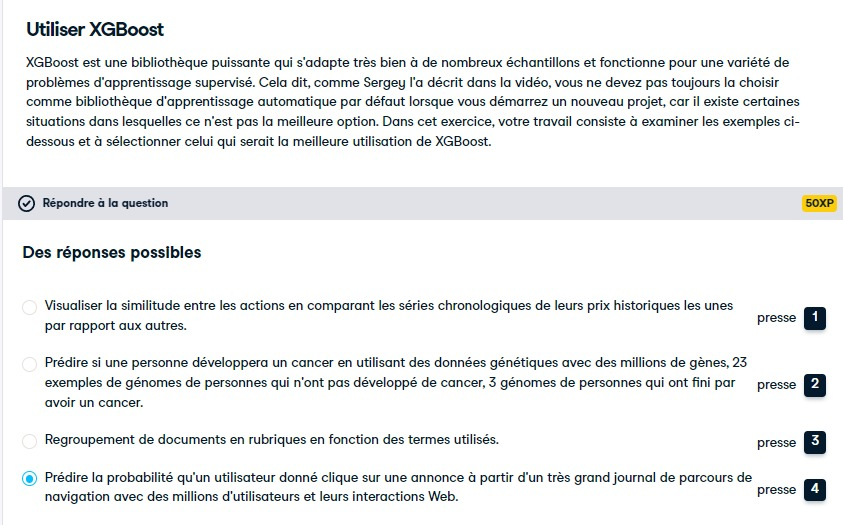

***Correct! Manière de finir le chapitre. Il est temps d'appliquer XGBoost pour résoudre les problèmes de régression !***

####**1. Examen de régression**

+ ***Félicitations pour avoir terminé le chapitre 1 ! Maintenant que vous avez appris à utiliser XGBoost pour la classification, vous apprendrez à utiliser XGBoost pour la régression dans ce chapitre.***

####**2. Bases de la régression**

+ ***Les problèmes de régression impliquent la prédiction de valeurs continues ou réelles. Par exemple, si vous essayez de prédire la taille en centimètres d'une personne donnée à 30 ans compte tenu de certains de ses attributs physiques à la naissance, vous résolvez un problème de régression. L'évaluation de la qualité d'un modèle de régression implique l'utilisation d'un ensemble de métriques différent de ceux que nous avons décrits pour une utilisation dans les problèmes de classification au chapitre 1.***

####**3. Métriques de régression courantes**

+ ***Dans la plupart des cas, nous utilisons l'erreur quadratique moyenne (RMSE) ou l'erreur absolue moyenne (MAE) pour évaluer la qualité d'un modèle de régression.***

####**4. Calcul RMSE**

+ ***RMSE est calculé par***

####**5. Calcul RMSE**

+ ***prendre la différence entre les valeurs réelles et prédites pour ce que vous essayez de prédire,***

####**6. Calcul RMSE**

+ ***mettre au carré ces différences, calculer leur moyenne et prendre la racine carrée de cette valeur. Cela nous permet de traiter les différences négatives et positives de la même manière, mais tend à punir beaucoup plus les différences plus importantes entre les valeurs prédites et réelles que les plus petites.***

####**7. Calcul MAE**

+ ***MAE, d'autre part, additionne simplement les différences absolues entre les valeurs prédites et réelles sur tous les échantillons sur lesquels nous construisons notre modèle. Bien que MAE ne soit pas autant affecté par de grandes différences que RMSE, il lui manque quelques propriétés mathématiques intéressantes qui le rendent beaucoup moins fréquemment utilisé comme métrique d'évaluation.***

####**8. Algorithmes de régression courants**

+ ***Certains algorithmes courants utilisés pour les problèmes de régression incluent la régression linéaire et les arbres de décision.***

####**9. Algorithmes pour la régression et la classification**

+ ***Il est important de noter brièvement ici que certains algorithmes, tels que les arbres de décision, peuvent être utilisés à la fois pour les tâches de régression et de classification, ce qui, comme nous le verrons, est l'une de leurs propriétés importantes qui en fait des candidats de choix pour être des blocs de construction pour les modèles XGBoost.***

  + *https://www.ibm.com/support/knowledgecenter/en/SS3RA7_15.0.0/ com.ibm.spss.modeler.help/nodes_treebuilding.htm*


####**10. Entraînons-nous !**

+ ***Génial, testons vos connaissances en matière de régression avec des questions à choix multiples.***

###**EXERCICES**

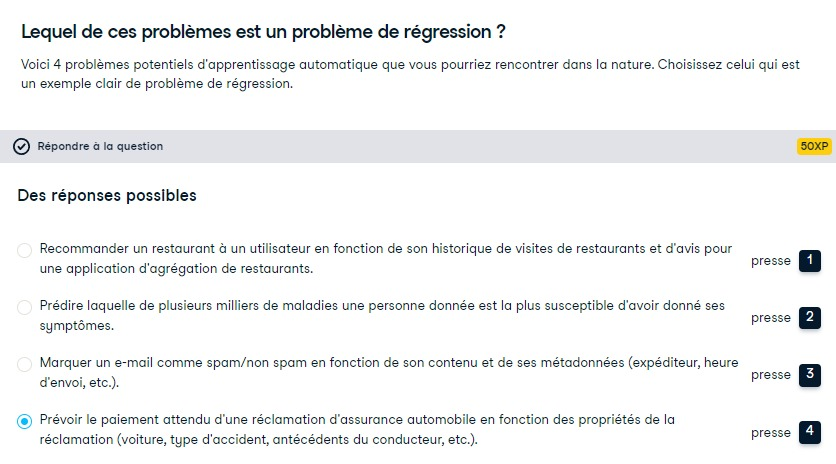

***Bien joué! Il s'agit bien d'un exemple de problème de régression.***

####**1. Fonctions objectives (de perte) et apprenants de base**

+ ***Parlons un peu des fonctions objectives et des apprenants de base afin que nous puissions développer de meilleures intuitions sur les deux concepts, car ils sont essentiels à comprendre pour que vous puissiez comprendre pourquoi XGBoost est une approche si puissante pour créer des modèles de régression supervisée.***

####**2. Fonctions objectives et pourquoi nous les utilisons**

+ ***Une fonction d'objectif ou de perte quantifie la distance entre notre prédiction et le résultat réel pour un point de données donné. Il mappe la différence entre la prédiction et la cible sur un nombre réel. Lorsque nous construisons un modèle d'apprentissage automatique, nous le faisons dans l'espoir qu'il minimise la fonction de perte sur tous les points de données que nous transmettons. C'est notre objectif ultime, la plus petite perte possible.***

####**3. Fonctions de perte communes et XGBoost**

+ ***Les fonctions de perte ont des conventions de dénomination spécifiques dans XGBoost. Pour les modèles de régression, la fonction de perte la plus couramment utilisée est appelée reg linéaire. Pour les modèles de classification binaire, les fonctions de perte les plus couramment utilisées sont la logistique régulière, lorsque vous voulez simplement la catégorie de la cible, et la logistique binaire, lorsque vous voulez la probabilité prédite réelle de la classe positive. Ainsi, dans le chapitre 1, nous utilisions implicitement la fonction de perte logistique reg lors de la construction de nos modèles de classification dans XGBoost.***

####**4. Les apprenants de base et pourquoi nous en avons besoin**

+ ***Comme mentionné précédemment, XGBoost est une méthode d'apprentissage d'ensemble composée de nombreux modèles individuels qui sont additionnés pour générer une seule prédiction. Chacun des modèles individuels formés et combinés est appelé apprenants de base. L'objectif de XGBoost est d'avoir des apprenants de base qui sont légèrement meilleurs que les devinettes aléatoires sur certains sous-ensembles d'exemples de formation, et uniformément mauvais pour le reste, de sorte que lorsque toutes les prédictions sont combinées, les prédictions uniformément mauvaises s'annulent et celles légèrement meilleures que le hasard se combinent en une seule très bonne prédiction. Regardons quelques exemples utilisant des arbres et des apprenants de base linéaires dans XGBoost.***

####**5. Arbres comme exemple d'apprenants de base : API Scikit-learn**

+ ***Voici un exemple de formation d'un modèle de régression XGBoost avec des arbres comme apprenants de base à l'aide de l'API compatible scikit-learn de XGBoost. Nous utiliserons l'ensemble de données Boston Housing du référentiel d'apprentissage automatique de l'UCI comme exemple. Aux lignes 1 à 5, nous importons les bibliothèques dont nous avons besoin et chargeons les données. Aux lignes 6 et 7, nous convertissons nos données dans notre matrice $X$ et notre vecteur $y$ et nous les divisons en ensembles d'apprentissage et de test comme nous l'avons fait auparavant. Aux lignes 8 à 10, nous créons notre objet régresseur XGBoost, cette fois en nous assurant d'utiliser la fonction d'objectif linéaire reg, de l'adapter à nos données d'apprentissage et de générer nos prédictions sur l'ensemble de test.***

####**6. Arbres comme exemple d'apprenants de base : API Scikit-learn**

+ ***Et enfin, aux lignes 11 et 12, nous calculons le RMSE et imprimons le résultat à l'écran.***

####**7. Exemple d'apprenants de base linéaire : API d'apprentissage uniquement**

+ ***Pour utiliser les apprenants de base linéaires, nous devons utiliser l'API d'apprentissage dans XGBoost. Voici un exemple. Dans les lignes 1 à 7, nous faisons ce que nous avons fait comme avant, en chargeant les bibliothèques et les données appropriées. Aux lignes 8 et 9, nous convertissons nos ensembles d'entraînement et de test en objets DMatrix, comme l'exige l'API d'apprentissage. À la ligne 10, nous créons un dictionnaire de paramètres spécifiant explicitement l'apprenant de base que nous voulons comme gblinar, et la fonction d'objectif linéaire reg que nous voulons utiliser. Aux lignes 11-12, nous entraînons notre modèle sur l'ensemble d'apprentissage et générons des prédictions à l'aide de l'ensemble de test.***

####**8. Exemple d'apprenants de base linéaire : API d'apprentissage uniquement**

+ ***Aux lignes 13 et 14, nous calculons notre rmse et imprimons à l'écran, comme nous le faisions auparavant.***

####**9. Au travail !**

+ ***Ok, mettons-nous au travail !***

###**EXERCICES**
####**Arbres de décision en tant qu'apprenants de base**

+ ***Il est maintenant temps de construire un modèle XGBoost pour prédire les prix des maisons - pas à Boston, Massachusetts, comme vous l'avez vu dans la vidéo, mais à Ames, Iowa ! Cet ensemble de données sur les prix des logements a été préchargé dans un DataFrame appelé df. Si vous l'explorez dans le Shell, vous verrez qu'il existe une variété de caractéristiques concernant la maison et son emplacement dans la ville.***

+ ***Dans cet exercice, votre objectif est d'utiliser des arbres comme apprenants de base. Par défaut, XGBoost utilise des arbres comme apprenants de base, vous n'avez donc pas à spécifier que vous souhaitez utiliser des arbres ici avec booster="gbtree".***

+ *xgboost a été importé sous xgb et les tableaux des entités et de la cible sont disponibles respectivement dans $X$ et $y$.*

####**Instructions**

+ Divisé dfen ensembles de formation et de test, en gardant 20 % pour les tests. Utilisez un random_state de 123.
+ Instanciez XGBRegressoras xg_reg, en utilisant a seedof 123.
+ Spécifiez un objectif de "reg:linear"et utilisez 10 arbres.
+ Remarque : Vous n'avez pas à le spécifier booster="gbtree"car il s'agit de la valeur par défaut.

+ Ajustez xg_reg les données d'apprentissage et prédisez les étiquettes de l'ensemble de test. Enregistrez les prédictions dans une variable appelée preds.
+ Calculez l'utilisation rmse np.sqrt()et la fonction mean_squared_error() de sklearn.metrics, qui a été pré-importé.

In [19]:
df = pd.read_csv('ames_housing_trimmed_processed.csv')
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,Remodeled,GrLivArea,BsmtFullBath,BsmtHalfBath,...,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,PavedDrive_P,PavedDrive_Y,SalePrice
0,60,65.0,8450,7,5,2003,0,1710,1,0,...,0,0,0,0,1,0,0,0,1,208500
1,20,80.0,9600,6,8,1976,0,1262,0,1,...,0,1,0,0,0,0,0,0,1,181500
2,60,68.0,11250,7,5,2001,1,1786,1,0,...,0,0,0,0,1,0,0,0,1,223500
3,70,60.0,9550,7,5,1915,1,1717,1,0,...,0,0,0,0,1,0,0,0,1,140000
4,60,84.0,14260,8,5,2000,0,2198,1,0,...,0,0,0,0,1,0,0,0,1,250000


In [20]:
X, y = df.iloc[:, :-1], df.iloc[:, -1]

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [22]:
# Create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Instantiate the XGBRegressor: xg_reg
xg_reg = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=10, seed=123)

# Fit the regressor to the training set
xg_reg.fit(X_train, y_train)

# Predict the labels of the test set: preds
preds = xg_reg.predict(X_test)

# Compute the rmse: rmse
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 28106.463641


***Bien joué! Ensuite, vous formerez un modèle XGBoost à l'aide d'apprenants de base linéaires et de l'API d'apprentissage de XGBoost. Fonctionnera-t-il mieux ou moins bien ?***

####**Apprenants de base linéaire**

+ ***Maintenant que vous avez utilisé des arbres comme modèles de base dans XGBoost, utilisons l'autre type de modèle de base qui peut être utilisé avec XGBoost - un apprenant linéaire. Ce modèle, bien qu'il ne soit pas aussi couramment utilisé dans XGBoost, vous permet de créer une régression linéaire régularisée à l'aide de la puissante API d'apprentissage de XGBoost. Cependant, comme c'est rare, vous devez utiliser les propres fonctions non compatibles scikit-learn de XGBoost pour créer le modèle, telles que xgb.train().***

+ ***Pour ce faire, vous devez créer le dictionnaire de paramètres qui décrit le type de booster que vous souhaitez utiliser (de la même manière que vous avez créé le dictionnaire au chapitre 1 lorsque vous avez utilisé xgb.cv()). La paire clé-valeur qui définit le type de booster (modèle de base) dont vous avez besoin est "booster":"gblinear".***

+ ***Une fois que vous avez créé le modèle, vous pouvez utiliser les méthodes .train()et .predict() du modèle comme vous l'avez fait dans le passé.***

+ *Ici, les données ont déjà été divisées en ensembles de formation et de test, vous pouvez donc vous plonger directement dans la création des objets  DMatrixrequis par l'API d'apprentissage XGBoost.*

####**Instructions**

+ Créez deux objets DMatrix
  + DM_trainpour l'ensemble d'apprentissage ( X_train et y_train),
  + DM_test(X_test et y_test) pour l'ensemble de test.

  + Créez un dictionnaire de paramètres qui définit le "booster"type que vous utiliserez ( "gblinear") ainsi que celui que "objective"vous minimiserez ( "reg:linear").
  + Entraînez le modèle à l'aide de xgb.train().
  + Vous devez spécifier des arguments pour les paramètres suivants : params, dtrain et num_boost_round. Utilisez 5 des tours de boost.
  + Prédisez les étiquettes sur le jeu de test en utilisant xg_reg.predict(), en le passant DM_test.
  + Attribuer à preds.
  + Appuyez sur "Soumettre la réponse" pour afficher le RMSE !

In [23]:
# Convert the training and testing sets into DMatrixes: DM_train, DM_test
DM_train = xgb.DMatrix(data=X_train, label=y_train)
DM_test =  xgb.DMatrix(data=X_test, label=y_test)

# Create the parameter dictionary: params
params = {"booster":"gblinear", "objective":"reg:squarederror"}

# Train the model: xg_reg
xg_reg = xgb.train(params = params, dtrain=DM_train, num_boost_round=5)

# Predict the labels of the test set: preds
preds = xg_reg.predict(DM_test)

# Compute and print the RMSE
rmse = np.sqrt(mean_squared_error(y_test,preds))
print("RMSE: %f" % (rmse))

RMSE: 45057.889713


***Intéressant - il semble que les apprenants de base linéaire aient obtenu de meilleurs résultats!***

####**Évaluation de la qualité du modèle**
+ ***Il est maintenant temps de commencer à évaluer la qualité du modèle.***

+ *Ici, vous comparerez le RMSE et le MAE d'un modèle XGBoost à validation croisée sur les données de logement d'Ames. Comme dans les exercices précédents, tous les modules nécessaires ont été préchargés et les données sont disponibles dans le DataFrame df.*

####**Consignes**

+ Effectuez une validation croisée quadruple avec 5 des tours de boost et "rmse" comme métrique.
+ Extrayez et imprimez le RMSE du tour de boosting final.
+ Maintenant, adaptez votre code pour calculer le "mae"au lieu du "rmse".

In [24]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:squarederror", "max_depth":4}

# Perform cross-validation: cv_results
cv_results = xgb.cv(dtrain=housing_dmatrix,
                    params=params, nfold=4,
                    num_boost_round=5,
                    metrics="rmse",
                    as_pandas=True,
                    seed=123)

# Print cv_results
print(cv_results)

   train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0    141767.533478      429.451090   142980.434934    1193.795492
1    102832.547530      322.472076   104891.395389    1223.157368
2     75872.617039      266.474211    79478.938743    1601.345019
3     57245.651780      273.624239    62411.921348    2220.150063
4     44401.298519      316.423620    51348.279619    2963.378136


In [25]:
# Extract and print final boosting round metric
print((cv_results["test-rmse-mean"]).tail(1))

4    51348.279619
Name: test-rmse-mean, dtype: float64


In [26]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X,label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:squarederror", "max_depth":4}

# Perform cross-validation: cv_results
cv_results = xgb.cv(dtrain=housing_dmatrix,
                    params=params, nfold=4,
                    num_boost_round=5,
                    metrics="mae",
                    as_pandas=True,
                    seed=123)

# Print cv_results
print(cv_results)

   train-mae-mean  train-mae-std  test-mae-mean  test-mae-std
0   127343.480012     668.306786  127633.999275   2404.005913
1    89770.056424     456.963854   90122.501070   2107.909841
2    63580.789280     263.405054   64278.558741   1887.567534
3    45633.156501     151.883868   46819.168555   1459.818435
4    33587.090044      86.998100   35670.647207   1140.607311


In [27]:
# Extract and print final round boosting round metric
print((cv_results["test-mae-mean"]).tail(1))

4    35670.647207
Name: test-mae-mean, dtype: float64


####**1. Régularisation et apprenants de base dans XGBoost**

+ ***Les fonctions de perte dans XGBoost ne tiennent pas seulement compte de la proximité des prédictions d'un modèle avec les valeurs réelles, mais aussi tenir compte de la complexité du modèle. Cette idée de pénaliser les modèles à mesure qu'ils deviennent plus complexes s'appelle la régularisation.***

####**2. Régularisation dans XGBoost**

 + ***Ainsi, les fonctions de perte dans XGBoost sont utilisées pour trouver des modèles à la fois précis et aussi simples que possible. Plusieurs paramètres peuvent être modifiés dans XGBoost pour limiter la complexité du modèle en modifiant la fonction de perte. Gamma est un paramètre pour les apprenants de base arborescente qui contrôle si un nœud donné sur un apprenant de base se divisera en fonction de la réduction attendue de la perte qui se produirait après avoir effectué la division, de sorte que des valeurs plus élevées conduisent à moins de divisions. Alpha est un autre nom pour la régularisation L1. Cependant, ce terme de régularisation est une pénalité sur les poids des feuilles plutôt que sur les poids des caractéristiques, comme c'est le cas dans la régression linéaire ou logistique. Des valeurs alpha plus élevées conduisent à une régularisation L1 plus forte, ce qui fait passer de nombreux poids de feuille dans les apprenants de base à 0. Lambda est un autre nom pour la régularisation l2. La régularisation L2 est une pénalité beaucoup plus douce que l1 et entraîne une diminution progressive des poids des feuilles, au lieu d'appliquer de fortes contraintes de parcimonie sur les poids des feuilles comme dans l1. Si vous souhaitez en savoir plus sur la régularisation, consultez le cours d'apprentissage supervisé avec Scikit Learn de DataCamp.***

####**3. Régularisation L1 dans l'exemple XGBoost**

+ ***Examinons un exemple de la façon dont vous pouvez régler l'un de ces paramètres de régularisation à l'aide de XGBoost. Comme toujours, dans les lignes 1 à 4, nous importons les bibliothèques nécessaires, chargeons les données avec lesquelles nous allons travailler et créons notre matrice de caractéristiques et les vecteurs cibles X et y. À la ligne 5, nous convertissons notre matrice X et notre vecteur y en un seul objet DMatrix optimisé, et à la ligne 6, nous créons notre dictionnaire de paramètres qui définit certains paramètres requis pour notre apprenant. Plus précisément, nous fournissons la fonction de perte nécessaire à la régression et la profondeur maximale que chaque apprenant de base d'arbre peut avoir. À la ligne 7, nous créons une liste de 3 valeurs l1 ou alpha différentes que nous allons essayer, et à la ligne 8, nous initialisons une liste vide qui stockera notre erreur quadratique moyenne finale pour chacune de ces valeurs l1 ou alpha. La ligne 9 est en fait une boucle for multiligne où nous parcourons chaque entrée de notre liste l1_params et faisons ce qui suit. Tout d'abord, nous créons une nouvelle paire clé-valeur dans notre dictionnaire de paramètres qui contient notre valeur alpha actuelle. Nous exécutons ensuite notre validation croisée XGBoost en transmettant notre objet DMatrix, le dictionnaire de paramètres mis à jour, le nombre de plis que nous voulons valider de manière croisée, le nombre d'arbres que nous voulons comme num_boost_round, la métrique que nous voulons calculer, qui est rmse, et que nous souhaitez afficher les résultats sous forme de pandas DataFrame. Aux lignes 10 et 11, nous regardons simplement la RMSE finale en fonction de la force de régularisation l1. À ce stade, nous avons parlé de Nous exécutons ensuite notre validation croisée XGBoost en transmettant notre objet DMatrix, le dictionnaire de paramètres mis à jour, le nombre de plis que nous voulons valider de manière croisée, le nombre d'arbres que nous voulons comme num_boost_round, la métrique que nous voulons calculer, qui est rmse, et que nous souhaitez afficher les résultats sous forme de pandas DataFrame. Aux lignes 10 et 11, nous regardons simplement la RMSE finale en fonction de la force de régularisation l1. À ce stade, nous avons parlé de Nous exécutons ensuite notre validation croisée XGBoost en transmettant notre objet DMatrix, le dictionnaire de paramètres mis à jour, le nombre de plis que nous voulons valider de manière croisée, le nombre d'arbres que nous voulons comme num_boost_round, la métrique que nous voulons calculer, qui est rmse, et que nous souhaitez afficher les résultats sous forme de pandas DataFrame. Aux lignes 10 et 11, nous regardons simplement la RMSE finale en fonction de la force de régularisation l1.***

####**4. Basez les apprenants dans XGBoost**

+ *** À ce stade, nous avons parlé des apprenants de base et la régularisation un peu. Terminons cela en comparant les deux types d'apprenants de base qui existent dans XGBoost. L'apprenant de base linéaire est simplement une somme de termes linéaires, exactement comme vous le trouveriez dans un modèle de régression linéaire ou logistique. Lorsque vous combinez plusieurs de ces modèles de base dans un ensemble, vous obtenez une somme pondérée de modèles linéaires, qui est elle-même linéaire. Étant donné que vous n'obtenez aucune combinaison non linéaire de fonctionnalités dans le modèle final, cette approche est rarement utilisée, car vous pouvez obtenir des performances identiques à partir d'un modèle linéaire régularisé. L'apprenant à base d'arbres utilise des arbres de décision comme modèles de base. Lorsque les arbres de décision sont tous combinés en un ensemble, leur combinaison devient une fonction non linéaire de chaque arbre individuel, qui lui-même est non linéaire. À ce stade, je veux mentionner brièvement comment vous verrez***

####**5. Création de DataFrames à partir de plusieurs listes de longueur égale***

+ ***Les trames de données sont créées dans les prochains exercices après avoir calculé vos résultats. Nous utiliserons à la fois les fonctions zip et list, l'une à l'intérieur de l'autre, pour convertir plusieurs listes de longueur égale en un seul objet que nous pouvons convertir en une trame de données pandas. Zip est une fonction qui vous permet de prendre plusieurs listes de longueur égale et de les parcourir en parallèle, côte à côte, comme indiqué ci-dessus. Cependant, en python 3, zip crée un générateur ou un objet qui n'a pas besoin d'être complètement instancié au moment de l'exécution. Pour que la paire entière de listes zippées soit instanciée, nous devons transtyper directement l'objet générateur de zip dans une liste. Après le casting, nous pouvons convertir cet objet directement en dataframe. Le but de tout cela est de ne pas vous sentir dépassé lorsque vous voyez ce modèle dans les exercices suivants,***

####**6. Entraînons-nous !**

+ ***Maintenant, c'est à vous d'effectuer la régularisation l2 avec un modèle XGBoost dans les exercices suivants. De plus, vous apprendrez à visualiser les importances des fonctionnalités dans votre modèle.***

###**EXERCICES**

####**Utilisation de la régularisation dans XGBoost**

+ ***Après avoir vu un exemple de régularisation l1 dans la vidéo, vous allez maintenant faire varier la pénalité de régularisation l2 - également appelée "lambda"- et voir son effet sur les performances globales du modèle sur l'ensemble de données de logement d'Ames.***

####**Instructions**

+ Créez votre DMatrix depuis $X$ et $y$ comme avant.
+ Créez un dictionnaire de paramètres initial spécifiant un "objective"de "reg:linear" et "max_depth"de 3.
+ Utiliser xgb.cv()à l'intérieur d'une forboucle et faire varier systématiquement la valeur "lambda" en passant la valeur l2 courante (reg).
+ Ajoutez le "test-rmse-mean" du dernier cycle de boosting pour chaque xgboostmodèle à validation croisée.
+ Appuyez sur "Soumettre la réponse" pour afficher les résultats. Que remarquez-vous ?

In [28]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

reg_params = [1, 10, 100]

# Create the initial parameter dictionary for varying l2 strength: params
params = {"objective":"reg:squarederror","max_depth":3}

# Create an empty list for storing rmses as a function of l2 complexity
rmses_l2 = []

# Iterate over reg_params
for reg in reg_params:

    # Update l2 strength
    params["lambda"] = reg

    # Pass this updated param dictionary into cv
    cv_results_rmse = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=2, num_boost_round=5, metrics="rmse", as_pandas=True, seed=123)

    # Append best rmse (final round) to rmses_l2
    rmses_l2.append(cv_results_rmse["test-rmse-mean"].tail(1).values[0])

In [29]:
# Look at best rmse per l2 param
print("Best rmse as a function of l2:")
print(pd.DataFrame(list(zip(reg_params, rmses_l2)), columns=["l2", "rmse"]))

Best rmse as a function of l2:
    l2          rmse
0    1  52275.357003
1   10  57746.063828
2  100  76624.627811


***Bon travail! Il semble que lorsque la valeur de 'lambda'augmente, le RMSE augmente également.***

####**Visualisation des arbres XGBoost individuels**

+ ***Maintenant que vous avez utilisé XGBoost pour créer et évaluer des modèles de régression ainsi que des modèles de classification, vous devriez savoir comment explorer visuellement vos modèles. Ici, vous visualiserez des arbres individuels à partir du modèle entièrement boosté créé par XGBoost à l'aide de l'ensemble des données de logement.***

+ *XGBoost a une fonction plot_tree() qui facilite ce type de visualisation. Une fois que vous avez formé un modèle à l'aide de l'API d'apprentissage XGBoost, vous pouvez le transmettre à la fonction plot_tree() avec le nombre d'arbres que vous souhaitez tracer à l'aide de l'argument num_trees.*

####**Instructions**

+ Créez un dictionnaire de paramètres avec un "objective"de "reg:linear"et un "max_depth"de 2.
+ Entraînez le modèle à l'aide de 10 tours de boosting et du dictionnaire de paramètres que vous avez créé.
+ Enregistrez le résultat au format xg_reg.
+ Tracez le premier arbre en utilisant xgb.plot_tree().

  + Il prend deux arguments ⚓
    + le modèle (dans ce cas, xg_reg) et num_trees, qui est indexé à 0.
    + Donc, pour tracer le premier arbre, spécifiez num_trees=0.
+ Tracez le cinquième arbre.
+ Placez le dernier (dixième) arbre sur le côté. Pour ce faire, spécifiez l'argument de mot clé supplémentaire rankdir="LR".

In [30]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:squarederror", "max_depth":2}

# Train the model: xg_reg
xg_reg = xgb.train(params=params, dtrain=housing_dmatrix, num_boost_round=10)

<Figure size 1500x1200 with 0 Axes>

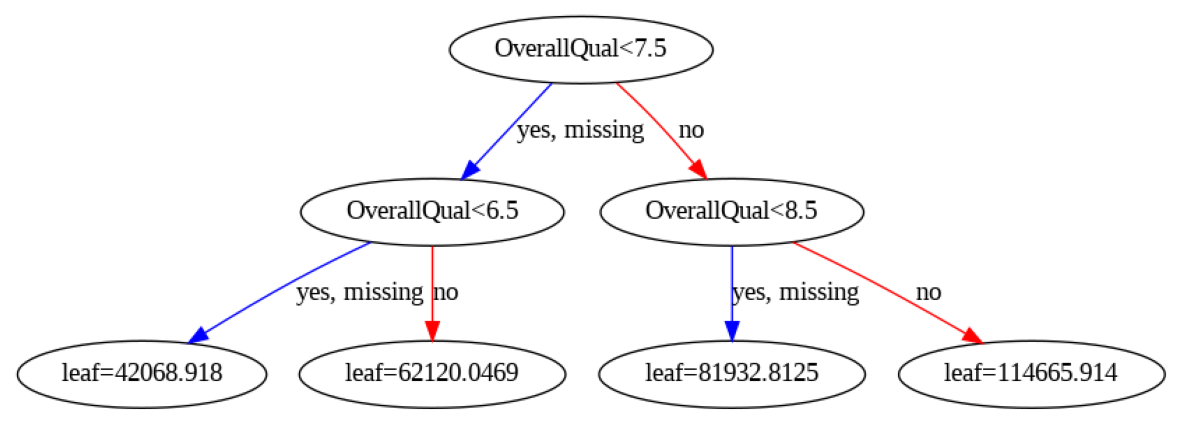

In [31]:
# Plot the first tree
plt.figure(figsize=(15,12))
xgb.plot_tree(xg_reg,num_trees=0)
plt.show()

<Figure size 1500x1200 with 0 Axes>

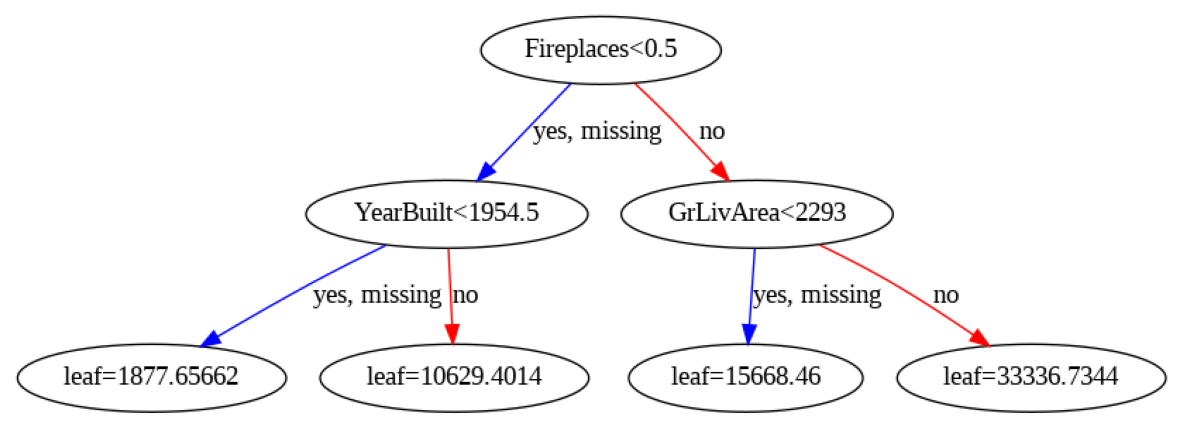

In [32]:
# Plot the fifth tree
plt.figure(figsize=(15,12))
xgb.plot_tree(xg_reg, num_trees=4)
plt.show()

<Figure size 1500x1200 with 0 Axes>

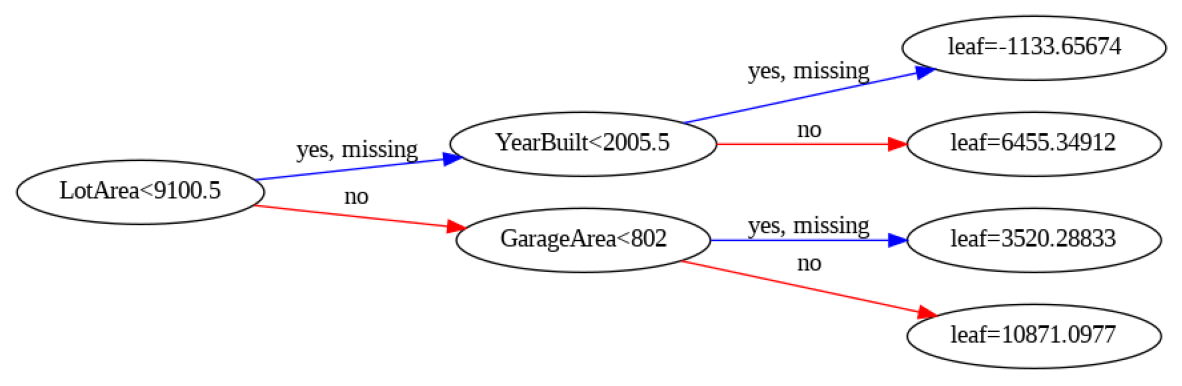

In [33]:
# Plot the last tree sideways
plt.figure(figsize=(15,12))
xgb.plot_tree(xg_reg,num_trees=9, rankdir="LR")
plt.show()

***Excellent! Jetez un oeil à chacune des parcelles. Ils donnent un aperçu de la façon dont le modèle est arrivé à ses décisions finales et des divisions qu'il a faites pour arriver à ces décisions. Cela nous permet d'identifier les caractéristiques les plus importantes dans la détermination du prix de l'immobilier. Dans l'exercice suivant, vous apprendrez une autre façon de visualiser l'importance des fonctionnalités.***

####**Visualisation de l'importance des fonctionnalités : quelles fonctionnalités sont les plus importantes dans mon jeu de données**

+ ***Une autre façon de visualiser vos modèles XGBoost consiste à examiner l'importance de chaque colonne de caractéristiques dans l'ensemble de données d'origine du modèle.***

+ ***Une manière simple de procéder consiste à compter le nombre de fois que chaque fonctionnalité est répartie sur tous les cycles de boost (arbres) du modèle, puis à visualiser le résultat sous forme de graphique à barres, les fonctionnalités étant classées en fonction du nombre de fois qu'elles apparaissent. XGBoost a une fonction plot_importance() qui vous permet de faire exactement cela, et vous aurez l'occasion de l'utiliser dans cet exercice !***

####**Instructions**

+ Créez votre DMatrix depuis $X$ et $y$ comme avant.
+ Créez un dictionnaire de paramètres avec approprié "objective"( "reg:linear") et un "max_depth"de 4.
+ Entraînez le modèle avec 10 des tours de boost, exactement comme vous l'avez fait dans l'exercice précédent.
+ Utilisez xgb.plot_importance() et transmettez le modèle entraîné pour générer le graphique des importances des fonctionnalités.

In [34]:
import seaborn as sns

<Figure size 1500x1200 with 0 Axes>

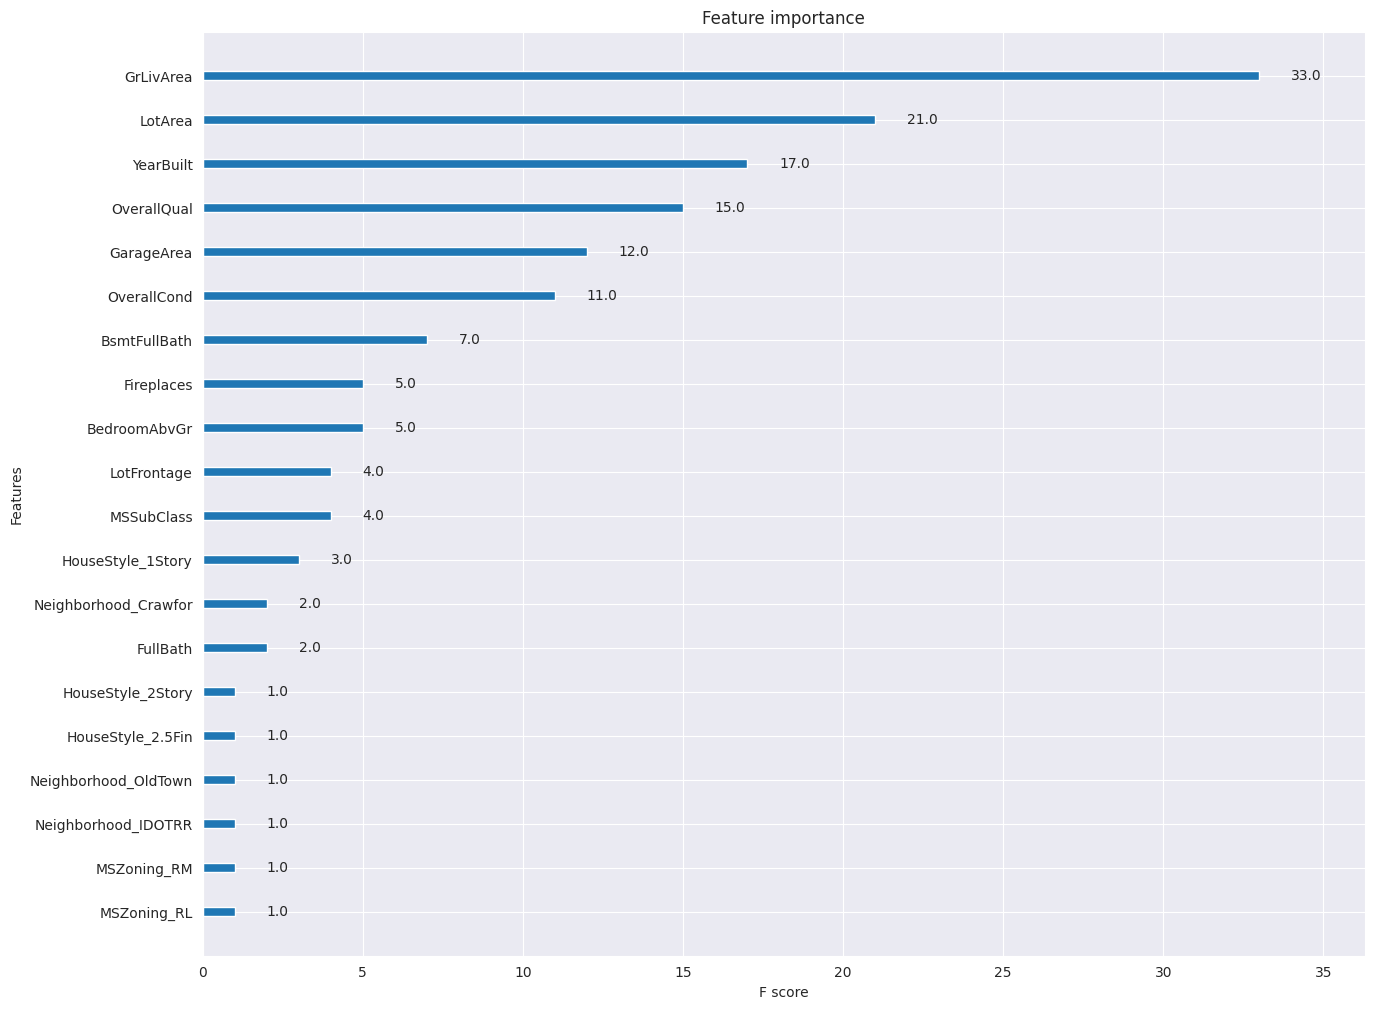

In [35]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X,label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:squarederror", "max_depth":4}

# Train the model: xg_reg
xg_reg = xgb.train(params=params, dtrain=housing_dmatrix, num_boost_round=10)

# Plot the feature importances
sns.set_style('darkgrid')
plt.figure(figsize=(15,12))
xgb.plot_importance(xg_reg)
plt.show()

***Brillant! Il semble que GrLivAreace soit la caractéristique la plus importante. Félicitations pour avoir terminé le chapitre 2 !***

####**1. Pourquoi régler votre modèle ?**

+ ***Jusqu'à présent, vous avez appris à utiliser XGBoost pour résoudre les problèmes de classification et de régression. Maintenant, vous apprendrez à suralimenter ces modèles en les réglant. Pour motiver la raison derrière ce chapitre sur le réglage de votre modèle XGBoost, jetons un coup d'œil à 2 cas, l'un où nous prenons le modèle XGBoost le plus simple possible et calculons un RMSE validé croisé, puis faisons exactement la même chose avec un XGBoost réglé modèle. Selon vous, quel sera l'effet du réglage du modèle sur la réduction globale du RMSE ?***

####**2. Exemple de modèle non réglé**

+ ***Dans les lignes 1 à 6, nous chargeons simplement les bibliothèques nécessaires et les données de logement ames, puis convertissons nos données en une DMatrix. À la ligne 7, nous créons la configuration de paramètre la plus basique possible, en ne passant que la fonction objectif dont nous avons besoin pour créer un modèle de régression XGBoost. Cette configuration des paramètres sera rendue beaucoup plus complexe au fur et à mesure que nous ajustons nos modèles. En fait, lors de la recherche de paramètres, nous utiliserons un dictionnaire que nous appelons généralement une grille de paramètres, car il contiendra des plages de valeurs sur lesquelles nous rechercherons pour trouver une configuration optimale. Plus sur cela plus tard. À la ligne 8, nous exécutons notre validation croisée dans XGBoost, en passant dans la grille de paramètres simple et en lui disant d'exécuter une validation croisée quadruple, et de sortir la rmse comme métrique d'évaluation.***

####**3. Exemple de modèle optimisé**

+  ***À la ligne 9, nous imprimons simplement la rmse finale du modèle non accordé à l'écran, Examinons maintenant un exemple optimisé. Encore une fois, dans les lignes 1 à 6, nous chargeons les bibliothèques nécessaires et les données de logement ames, puis convertissons nos données en une DMatrix. À la ligne 7, nous créons une configuration de paramètre plus ajustée, en définissant colsample_bytree, learning_rate et max_depth sur de meilleures valeurs. Ce sont quelques-uns des paramètres xgboost les plus importants qui peuvent être réglés, et vous en apprendrez plus et vous vous exercerez à régler ces paramètres plus loin dans ce chapitre. À la ligne 8, nous exécutons notre validation croisée dans XGBoost, en transmettant notre grille de paramètres ajustée, ainsi qu'en fixant le nombre d'arbres à construire à 200, et en exécutant à nouveau une validation croisée 4 fois, et en sortant la rmse comme une évaluation métrique. À la ligne 9, nous imprimons la rmse finale du modèle accordé à l'écran, qui est d'environ 29 800 dollars. C'est une réduction de près de 14 % du RMSE !***

####**4. Ajustons quelques modèles !**

+ ***Maintenant que vous voyez que vous pouvez obtenir une amélioration significative des performances du modèle en réglant un modèle XGBoost, commençons à faire quelques réglages vous-même !***

###**EXERCICES**

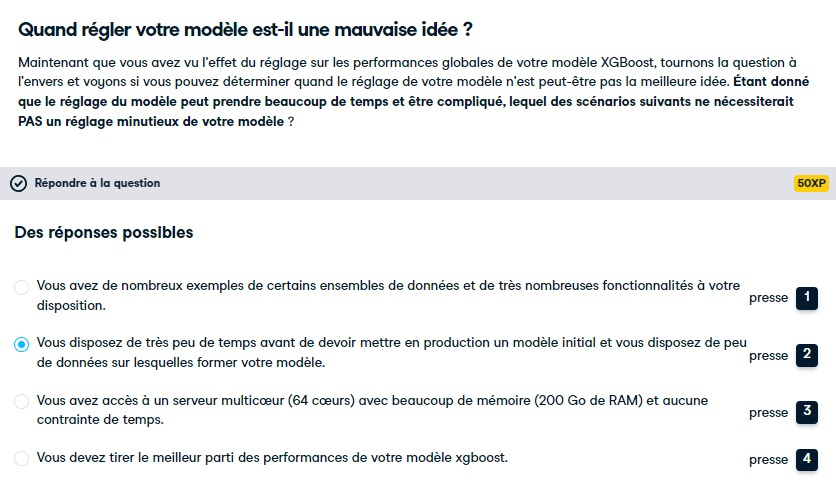

***Ouais! Vous ne pouvez pas accorder si vous n'avez pas le temps!***

####**Réglage du nombre de tours de boost**

+ ***Commençons par le réglage des paramètres en voyant comment le nombre de tours de boosting (nombre d'arbres que vous construisez) impacte les performances hors échantillon de votre modèle XGBoost. Vous utiliserez xgb.cv()à l'intérieur d'une forboucle et créerez un modèle par paramètre num_boost_round.***

+ *Ici, vous allez continuer à travailler avec l'ensemble de données de logement d'Ames. Les entités sont disponibles dans le tableau $X$ et le vecteur cible est contenu dans $y$.*

####**Instructions**

+ Créez un appel DMatrix housing_dmatrix depuis $X$ et $y$.
+ Créez un dictionnaire de paramètres appelé params, en transmettant les "objective"( "reg:linear") et "max_depth"(définissez-le sur 3).
+ Itérer num_rounds à l'intérieur d'une boucle for et effectuer une triple validation croisée. Dans chaque itération de la boucle, passez le nombre actuel de tours de boosting ( curr_num_rounds) à xgb.cv()comme argument à num_boost_round.
+ Ajoutez à la liste la RMSE du tour de boosting final pour chaque modèle XGBoost validé de manière croisée final_rmse_per_round.
+ num_rounds et final_rmse_per_round ont été compressés et convertis en DataFrame afin que vous puissiez facilement voir comment le modèle fonctionne à chaque tour de boost.
+ Cliquez sur "Soumettre la réponse" pour voir les résultats !

In [36]:
df = pd.read_csv('ames_housing_trimmed_processed.csv')
X, y = df.iloc[:, :-1], df.iloc[:, -1]

In [37]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary for each tree: params
params = {"objective":"reg:squarederror", "max_depth":3}

# Create list of number of boosting rounds
num_rounds = [5, 10, 15]

# Empty list to store final round rmse per XGBoost model
final_rmse_per_round = []

# Iterate over num_rounds and build one model per num_boost_round parameter
for curr_num_rounds in num_rounds:

    # Perform cross-validation: cv_results
    cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=3, num_boost_round=curr_num_rounds, metrics="rmse", as_pandas=True, seed=123)

    # Append final round RMSE
    final_rmse_per_round.append(cv_results["test-rmse-mean"].tail().values[-1])

# Print the resultant DataFrame
num_rounds_rmses = list(zip(num_rounds, final_rmse_per_round))
print(pd.DataFrame(num_rounds_rmses,columns=["num_boosting_rounds","rmse"]))

   num_boosting_rounds          rmse
0                    5  50903.299752
1                   10  34774.194090
2                   15  32895.099185


***Génial! Comme vous pouvez le voir, augmenter le nombre de tours de boost diminue le RMSE.***

####**Sélection automatisée du cycle de boosting à l'aide de early_stopping**
+ ***Désormais, au lieu d'essayer de sélectionner le meilleur nombre de tours de boost possible, vous pouvez très facilement demander à XGBoost de sélectionner automatiquement le nombre de tours de boost pour vous dans xgb.cv(). Cela se fait en utilisant une technique appelée arrêt précoce .***

+ ***L'arrêt précoce fonctionne en testant le modèle XGBoost après chaque cycle de boosting par rapport à un ensemble de données de retenue et en arrêtant la création de rounds de boosting supplémentaires (finissant ainsi la formation du modèle plus tôt) si la métrique de hold-out (dans notre cas) ne s'améliore pas "rmse"pour un nombre donné de tours. Ici, vous utiliserez le paramètre early_stopping_rounds xgb.cv()avec un grand nombre possible de tours de boost (50). Gardez à l'esprit que si la métrique d'exclusion s'améliore continuellement jusqu'au moment où num_boost_rounds elle est atteinte, l'arrêt anticipé ne se produit pas.***

+ *Ici, le dictionnaire DMatrix de paramètres et ont été créés pour vous. Votre tâche consiste à utiliser la validation croisée avec arrêt anticipé. Allez-y!*

####**Instructions**

+ Effectuez une triple validation croisée avec un arrêt précoce et "rmse"comme métrique.
+ Utilisez  les premiers 10 tours d'arrêt et 50les tours de boost. Spécifiez un seed de 123 et assurez-vous que la sortie est un pandasDataFrame.
+ N'oubliez pas de spécifier les autres paramètres tels que dtrain, paramset metrics.
+ Imprimer cv_results.

In [38]:
# Create your housing DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary for each tree: params
params = {"objective":"reg:squarederror", "max_depth":4}

# Perform cross-validation with early stopping: cv_results
cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=3,early_stopping_rounds=10, num_boost_round=50, metrics="rmse", as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

    train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0     141871.635216      403.633062   142640.653507     705.559723
1     103057.033818       73.768079   104907.664683     111.117033
2      75975.967655      253.727043    79262.056654     563.766693
3      57420.530642      521.658273    61620.137859    1087.693428
4      44552.956483      544.170426    50437.560906    1846.446643
5      35763.948865      681.796675    43035.659539    2034.471115
6      29861.464164      769.571418    38600.880800    2169.796804
7      25994.675122      756.520639    36071.817710    2109.795408
8      23306.836299      759.237848    34383.186387    1934.547433
9      21459.770256      745.624640    33509.140338    1887.375358
10     20148.721060      749.612186    32916.806725    1850.893437
11     19215.382607      641.387200    32197.833474    1734.456654
12     18627.388962      716.256240    31770.852340    1802.154296
13     17960.695080      557.043324    31482.782172    1779.12

####**1. Paramètres réglables dans XGBoost**

+ ***Passons maintenant en revue les différences dans les paramètres qui peuvent être réglés pour chaque type de modèle de base dans XGBoost. Les paramètres qui peuvent être ajustés sont très différents pour chaque apprenant de base.***

####**2. Paramètres communs d'arborescence réglables**

+ ***Pour l'apprenant de base arborescente, qui est celui que vous devez utiliser dans presque tous les cas, les paramètres les plus fréquemment réglés sont décrits ci-dessous. Le taux d'apprentissage affecte la rapidité avec laquelle le modèle ajuste l'erreur résiduelle en utilisant des apprenants de base supplémentaires. Un faible taux d'apprentissage nécessitera plus de tours de boosting pour obtenir la même réduction d'erreur résiduelle qu'un modèle XGBoost avec un taux d'apprentissage élevé. Gamma, alpha et lambda ont été décrits au chapitre 2 et ont tous un effet sur le degré de régularisation du modèle formé. Max_depth doit avoir une valeur entière positive et affecte la profondeur à laquelle chaque arbre est autorisé à se développer pendant un tour de boost donné. Le sous-échantillon doit être une valeur comprise entre 0 et 1 et correspond à la fraction de l'ensemble d'entraînement total qui peut être utilisée pour un tour de boost donné. Si la valeur est faible, alors la fraction de vos données d'entraînement utilisées par tour de boost serait faible et vous pourriez rencontrer des problèmes de sous-ajustement, une valeur très élevée peut également entraîner un surajustement. Colsample_bytree est la fraction d'entités parmi lesquelles vous pouvez sélectionner lors d'un tour de boost donné et doit également être une valeur comprise entre 0 et 1. Une grande valeur signifie que presque toutes les fonctionnalités peuvent être utilisées pour construire un arbre pendant un tour de boost donné, alors qu'un petit signifie que la fraction d'entités pouvant être sélectionnées est très petite. En général, des valeurs colsample_bytree plus petites peuvent être considérées comme fournissant une régularisation supplémentaire au modèle, alors que l'utilisation de toutes les colonnes peut dans certains cas surajuster un modèle formé. Colsample_bytree est la fraction d'entités parmi lesquelles vous pouvez sélectionner lors d'un tour de boost donné et doit également être une valeur comprise entre 0 et 1. Une grande valeur signifie que presque toutes les fonctionnalités peuvent être utilisées pour construire un arbre pendant un tour de boost donné, alors qu'un petit signifie que la fraction d'entités pouvant être sélectionnées est très petite. En général, des valeurs colsample_bytree plus petites peuvent être considérées comme fournissant une régularisation supplémentaire au modèle, alors que l'utilisation de toutes les colonnes peut dans certains cas surajuster un modèle formé. Colsample_bytree est la fraction d'entités parmi lesquelles vous pouvez sélectionner lors d'un tour de boost donné et doit également être une valeur comprise entre 0 et 1. Une grande valeur signifie que presque toutes les fonctionnalités peuvent être utilisées pour construire un arbre pendant un tour de boost donné, alors qu'un petit signifie que la fraction d'entités pouvant être sélectionnées est très petite. En général, des valeurs colsample_bytree plus petites peuvent être considérées comme fournissant une régularisation supplémentaire au modèle, alors que l'utilisation de toutes les colonnes peut dans certains cas surajuster un modèle formé. alors qu'une petite valeur signifie que la fraction d'entités pouvant être sélectionnées est très petite. En général, des valeurs colsample_bytree plus petites peuvent être considérées comme fournissant une régularisation supplémentaire au modèle, alors que l'utilisation de toutes les colonnes peut dans certains cas surajuster un modèle formé. alors qu'une petite valeur signifie que la fraction d'entités pouvant être sélectionnées est très petite. En général, des valeurs colsample_bytree plus petites peuvent être considérées comme fournissant une régularisation supplémentaire au modèle, alors que l'utilisation de toutes les colonnes peut dans certains cas surajuster un modèle entraîné.***

####**3. Paramètres réglables linéaires**

+ ***Pour l'apprenant de base linéaire, le nombre de paramètres réglables est nettement inférieur. Vous n'avez accès qu'à la régularisation l1 et l2 sur les poids associés à une caractéristique donnée, puis à un autre terme de régularisation pouvant être appliqué au biais du modèle. Enfin, il est important de mentionner que le nombre de tours de boost (c'est-à-dire le nombre d'arbres que vous construisez ou le nombre d'apprenants de base linéaire que vous construisez) est lui-même un paramètre réglable.***

####**4. Passons au réglage !**

+ ***Maintenant que nous avons couvert les paramètres qui sont généralement réglés lors de l'utilisation de XGBoost, passons à quelques réglages !***

###**EXERCICES**

####**Réglage eta**
+ ***Il est temps de s'entraîner sérieusement à régler d'autres hyperparamètres XGBoost et d'observer leur effet sur les performances du modèle ! Vous commencerez par régler le "eta", également connu sous le nom de taux d'apprentissage.***

+ *Le taux d'apprentissage dans XGBoost est un paramètre qui peut varier entre 0et 1, avec des valeurs plus élevées de "eta"pondération des caractéristiques pénalisantes plus fortement, provoquant une régularisation beaucoup plus forte.*

####**Instructions**

+ Créez une liste appelée pour stocker les valeurs eta_valssuivantes : 0.001, 0.01, 0.1 et "eta".
+ Parcourez votre liste eta_vals à l'aide d'une boucle for.
+ À chaque itération de la forboucle, définissez la "eta"clé de paramspour qu'elle soit égale à curr_val.
+ Ensuite, effectuez une triple validation croisée avec un arrêt précoce ( 5tours), 10 des tours de relance, une métrique de "rmse"et un seedde 123. Assurez-vous que la sortie est un DataFrame.
+ Ajoutez le RMSE du tour final à la liste best_rmse.

In [39]:
# Create your housing DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary for each tree (boosting round)
params = {"objective":"reg:squarederror", "max_depth":3}

# Create list of eta values and empty list to store final round rmse per xgboost model
eta_vals = [0.001, 0.01, 0.1]
best_rmse = []

# Systematically vary the eta
for curr_val in eta_vals:

    params["eta"] = curr_val

    # Perform cross-validation: cv_results
    cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=3, early_stopping_rounds=5, num_boost_round=10, metrics="rmse", as_pandas=True, seed=123)



    # Append the final round rmse to best_rmse
    best_rmse.append(cv_results["test-rmse-mean"].tail().values[-1])

# Print the resultant DataFrame
print(pd.DataFrame(list(zip(eta_vals, best_rmse)), columns=["eta","best_rmse"]))

     eta      best_rmse
0  0.001  195736.402543
1  0.010  179932.183986
2  0.100   79759.411808


####**Réglage max_depth**

+ ***Dans cet exercice, votre travail consiste à ajuster max_depth, qui est le paramètre qui dicte la profondeur maximale à laquelle chaque arbre d'un tour de boost peut atteindre. Des valeurs plus petites conduiront à des arbres moins profonds et des valeurs plus grandes à des arbres plus profonds.***

####**Instructions**

+ Créez une liste appelée pour stocker les valeurs max_depths suivantes : 25, 10, 20 et "max_depth"
+ Parcourez votre liste max_depths à l'aide d'une boucle for.
+ Variez systématiquement "max_depth" à chaque itération de la boucle for et effectuez une double validation croisée avec un arrêt précoce ( 5tours), 10 des tours de boost, une métrique de "rmse"et un seed de 123.
+ Assurez-vous que la sortie est un DataFrame.

In [40]:
# Create your housing DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X,label=y)

# Create the parameter dictionary
params = {"objective":"reg:squarederror"}

# Create list of max_depth values
max_depths = [2, 5, 10, 20]
best_rmse = []

# Systematically vary the max_depth
for curr_val in max_depths:

    params["max_depth"] = curr_val

    # Perform cross-validation
    cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=2,
                 num_boost_round=10, early_stopping_rounds=5,
                 metrics="rmse", as_pandas=True, seed=123)

    # Append the final round rmse to best_rmse
    best_rmse.append(cv_results["test-rmse-mean"].tail().values[-1])

# Print the resultant DataFrame
print(pd.DataFrame(list(zip(max_depths, best_rmse)),columns=["max_depth","best_rmse"]))

   max_depth     best_rmse
0          2  37957.469464
1          5  35596.599504
2         10  36065.547345
3         20  36739.576068


####**Réglage de colsample_bytree**

+ ***Maintenant, il est temps de s'accorder "colsample_bytree". Vous avez déjà vu cela si vous avez déjà travaillé avec scikit-learn RandomForestClassifierou RandomForestRegressor, où il s'appelait simplement max_features. Dans xgboostet sklearn, ce paramètre (bien que nommé différemment) spécifie simplement la fraction d'entités à choisir à chaque division dans un arbre donné. Dans xgboost, colsample_bytree doit être spécifié sous la forme d'un nombre flottant compris entre 0 et 1.***

####**Instructions**

+ Créez une liste appelée colsample_bytree_vals pour stocker les valeurs 0.1, 0.5, 0.8et 1.
+ Variez systématiquement "colsample_bytree"et effectuez une validation croisée, exactement comme vous l'avez fait avec max_depth et eta précédemment.

In [41]:
# Create your housing DMatrix
housing_dmatrix = xgb.DMatrix(data=X,label=y)

# Create the parameter dictionary
params={"objective":"reg:squarederror", "max_depth":3}

# Create list of hyperparameter values: colsample_bytree_vals
colsample_bytree_vals = [0.1, 0.5, 0.8, 1]
best_rmse = []

# Systematically vary the hyperparameter value
for curr_val in colsample_bytree_vals:

    params["colsample_bytree"] = curr_val

    # Perform cross-validation
    cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=2,
                 num_boost_round=10, early_stopping_rounds=5,
                 metrics="rmse", as_pandas=True, seed=123)

    # Append the final round rmse to best_rmse
    best_rmse.append(cv_results["test-rmse-mean"].tail().values[-1])

# Print the resultant DataFrame
print(pd.DataFrame(list(zip(colsample_bytree_vals, best_rmse)), columns=["colsample_bytree","best_rmse"]))

   colsample_bytree     best_rmse
0               0.1  50033.734626
1               0.5  35656.185735
2               0.8  36399.002280
3               1.0  35836.044343


***Génial! Il existe plusieurs autres paramètres individuels que vous pouvez régler, tels que "subsample", qui dicte la fraction des données d'entraînement qui est utilisée lors d'un cycle de boosting donné. Ensuite : Grid Search et Random Search pour régler plus efficacement les hyperparamètres XGBoost !***

####**1. Examen de la recherche par grille et de la recherche aléatoire**


+ ***Comment trouver les valeurs optimales pour plusieurs hyperparamètres simultanément, conduisant à la perte la plus faible possible, lorsque leurs valeurs interagissent de manière non évidente et non linéaire ? Deux stratégies courantes pour choisir simultanément plusieurs valeurs d'hyperparamètres sont la recherche par grille et la recherche aléatoire. Il est donc important que nous les examinions ici et que nous voyions quels sont leurs avantages et leurs inconvénients, en examinant quelques exemples de la manière dont les deux peuvent être utilisés avec XGBoost et scikit. -apprenez les paquets.***

####**2. Recherche par grille : révision**

+ ***Grid Search est une méthode de recherche exhaustive dans une collection de valeurs de paramètres possibles. Par exemple, si vous souhaitez régler 2 hyperparamètres et 4 valeurs possibles pour chaque hyperparamètre, une recherche de grille sur cet espace de paramètres essaiera les 16 configurations de paramètres possibles. Dans une recherche de grille, vous essayez chaque configuration de paramètre, évaluez une métrique pour cette configuration et choisissez la configuration de paramètre qui vous a donné la meilleure valeur pour la métrique que vous utilisiez, qui dans notre cas sera l'erreur quadratique moyenne.***

####**3. Recherche par grille : exemple**

+ ***Passons en revue un exemple de grille de recherche sur plusieurs hyperparamètres à l'aide de XGBoost et de scikit learn. Dans les lignes 1 à 4, nous chargeons les bibliothèques nécessaires, y compris GridSearchCV de sklearn dot model_selection. Aux lignes 5 à 7, nous chargeons notre jeu de données et le convertissons en une DMatrix. À la ligne 8, nous créons notre grille d'hyperparamètres que nous voulons parcourir. Nous avons sélectionné 4 taux d'apprentissage différents (ou valeurs êta), 3 valeurs de sous-échantillon différentes et un seul nombre d'arbres. Le nombre total de configurations d'hyperparamètres distinctes est de 12, donc 12 modèles différents seront construits. À la ligne 9, nous créons notre régresseur, puis à la ligne 10, nous transmettons l'objet xgbregressor, la grille de paramètres, la métrique d'évaluation et le nombre de plis de validation croisée à GridSearchCV, puis nous adaptons immédiatement cet objet de recherche de grille à la ligne 11, comme tous les autres objets d'estimation scikit learn auxquels nous avons fait cela dans le passé. À la ligne 12, après avoir ajusté l'objet gridsearch, nous pouvons extraire les meilleurs paramètres trouvés par la recherche de grille et les imprimer à l'écran. A la ligne 13, on obtient le RMSE qui correspond aux meilleurs paramètres trouvés, et on voit que c'est ~28500 dollars.***

####**4. Recherche aléatoire : révision**

+ ***La recherche aléatoire est très différente de la recherche par grille dans la mesure où le nombre de modèles sur lesquels vous devez effectuer une itération n'augmente pas à mesure que vous développez l'espace global des hyperparamètres. Dans la recherche aléatoire, vous pouvez décider du nombre de modèles ou d'itérations que vous souhaitez essayer avant de vous arrêter. La recherche aléatoire consiste simplement à tirer une combinaison aléatoire de valeurs d'hyperparamètres possibles à partir de la plage d'hyperparamètres autorisés un nombre de fois défini. À chaque fois, vous entraînez un modèle avec les hyperparamètres sélectionnés, évaluez les performances de ce modèle, puis rincez et répétez. Lorsque vous avez créé le nombre de modèles que vous aviez spécifié initialement, vous choisissez simplement le meilleur***.

####**5. Recherche aléatoire : exemple**

+ ***Pour finir cette leçon, regardons un exemple de recherche aléatoire complet. Dans les lignes 1 à 7, nous chargeons les modules nécessaires, cette fois en chargeant dans RandomizedSearchCV à partir de sklearn dot model_selection, puis chargeons et convertissons les données dont nous avons besoin en un objet DMatrix comme toujours. À la ligne 8, nous créons notre grille de paramètres, cette fois en générant un grand nombre de valeurs de taux d'apprentissage et de valeurs de sous-échantillons à l'aide de np-dot-arange. Il y a 20 valeurs pour learning_rate (ou eta) et 20 valeurs pour subsample, ce qui représenterait 400 modèles à essayer si nous devions lancer une recherche de grille (ce que nous ne faisons pas ici). À la ligne 9, nous créons notre objet xgbregressor et à la ligne 10, nous créons notre objet RandomizedSearchCV, en transmettant le xgbregressor et la grille de paramètres que nous venons de créer. Nous avons également défini le nombre d'itérations que nous voulons que la recherche aléatoire procède à 25, nous savons donc qu'il ne pourra pas essayer les 400 configurations de paramètres possibles. Nous spécifions également la métrique d'évaluation que nous voulons utiliser et que nous voulons exécuter une validation croisée quadruple à chaque itération. À la ligne 11, nous adaptons notre objet randomizedsearchcv, ce qui peut prendre un peu de temps. Enfin, les lignes 12 et 13 impriment les meilleurs paramètres de modèle trouvés, et le meilleur RMSE correspondant.***

####**6. Entraînons-nous !**

+ ***Ok, maintenant, pratiquons la recherche par grille et la recherche aléatoire dans les exercices suivants.***

###**EXERCICES**
####**Recherche de grille avec XGBoost**

+ ***Maintenant que vous avez appris à régler les paramètres individuellement avec XGBoost, passons au niveau supérieur en utilisant scikit-learn GridSearchet RandomizedSearchles capacités avec validation croisée interne à l'aide des fonctions GridSearchCV et RandomizedSearchCV. Vous les utiliserez pour trouver le meilleur modèle de manière exhaustive à partir d'une collection de valeurs de paramètres possibles sur plusieurs paramètres simultanément. Mettons-nous au travail, en commençant par GridSearchCV!***

Instructions

+ Créez une grille de paramètres appelée gbm_param_gridqui contient une liste de "colsample_bytree"valeurs ( 0.3, 0.7), une liste avec une seule valeur pour "n_estimators"( 50) et une liste de 2 valeurs "max_depth"( 2, ).5
+ Instanciez un objet XGBRegressor appelé gbm.
+ Créez un objet GridSearchCV appelé grid_mse, en transmettant :
  + le paramètre grid à param_grid,
  + le XGBRegressor à estimator,
  + "neg_mean_squared_error" à scoring et 4à cv.
  + Spécifiez également verbose=1 afin que vous puissiez mieux comprendre la sortie.
+ Monter l'objet GridSearchCV sur $X$ et $y$.
+ Imprimez les meilleures valeurs de paramètres et les RMSE les plus faibles, en utilisant respectivement les attributs `.best_params_ et .best_score_ de grid_mse`.

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
# Create the parameter grid: gbm_param_grid
gbm_param_grid = {
    'colsample_bytree': [0.3, 0.7],
    'n_estimators': [50],
    'max_depth': [2, 5]
}

# Instantiate the regressor: gbm
gbm = xgb.XGBRegressor()

# Perform grid search: grid_mse
grid_mse = GridSearchCV(estimator=gbm, param_grid=gbm_param_grid, scoring="neg_mean_squared_error", cv=4, verbose=1)


# Fit grid_mse to the data
grid_mse.fit(X,y)

Fitting 4 folds for each of 4 candidates, totalling 16 fits


GridSearchCV(cv=4,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'colsample_bytree': [0.3, 0.7], 'max_depth': [2, 5],
                         'n_estimators': [50]},
             scoring='neg_mean_squared_error', verbose=1)

In [44]:
# Print the best parameters and lowest RMSE
print("Best parameters found: ", grid_mse.best_params_)

Best parameters found:  {'colsample_bytree': 0.3, 'max_depth': 5, 'n_estimators': 50}


In [45]:
print("Lowest RMSE found: ", np.sqrt(np.abs(grid_mse.best_score_)))

Lowest RMSE found:  29916.017850830365


***Excellent travail! Ensuite, RandomizedSearchCV.***

####**Recherche aléatoire avec XGBoost**

+ ***Souvent, GridSearchCV cela peut prendre beaucoup de temps, donc dans la pratique, vous voudrez peut-être utiliser RandomizedSearchCVà la place, comme vous le ferez dans cet exercice. La bonne nouvelle est que vous n'avez qu'à apporter quelques modifications à votre GridSearchCVcode pour le faire RandomizedSearchCV. La principale différence est que vous devez spécifier un paramètre param_distributions au lieu d'un paramètre param_grid.***

####**Instructions**

+ Créez une grille de paramètres appelée gbm_param_grid qui contient une liste avec une seule valeur pour 'n_estimators'( 25), et une liste de valeurs 'max_depth' entre 2 et 11 pour 'max_depth'- à utiliser range(2, 12)pour cela.
+ Créez un objet RandomizedSearchCV appelé randomized_mse, en transmettant :
  + le paramètre grid à param_distributions,
  + le XGBRegressor à estimator,
  + "neg_mean_squared_error" à scoring, 5à n_iter et 4 à cv.
  + Spécifiez également verbose=1afin que vous puissiez mieux comprendre la sortie.
+ Monter l'objet RandomizedSearchCV sur $X$ et $y$.

In [46]:
from sklearn.model_selection import RandomizedSearchCV

In [47]:
# Create the parameter grid: gbm_param_grid
gbm_param_grid = {
    'n_estimators': [25],
    'max_depth': np.arange(2, 12)
}

# Instantiate the regressor: gbm
gbm = xgb.XGBRegressor(n_estimators=10)

# Perform random search: grid_mse
randomized_mse = RandomizedSearchCV(estimator=gbm, param_distributions=gbm_param_grid, n_iter=5, scoring="neg_mean_squared_error", cv=4, verbose=1)


# Fit randomized_mse to the data
randomized_mse.fit(X,y)

Fitting 4 folds for each of 5 candidates, totalling 20 fits


RandomizedSearchCV(cv=4,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=10, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...),
                   n_iter=5,
                   param_distributions={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
                                        'n_estimators': [25]},
                   scoring='neg_mean_squared_error', verbose=1)

In [48]:
# Print the best parameters and lowest RMSE
print("Best parameters found: ", randomized_mse.best_params_)

Best parameters found:  {'n_estimators': 25, 'max_depth': 4}


In [49]:
print("Lowest RMSE found: ", np.sqrt(np.abs(randomized_mse.best_score_)))

Lowest RMSE found:  29998.4522530019


####**1. Limites de la recherche par grille et de la recherche aléatoire**

+ ***Maintenant que vous avez effectué à la fois GridSearch et RandomSearch pour le réglage des hyperparamètres sur les données de logement d'Ames, passons brièvement en revue les limites de ces deux approches pour le réglage des hyperparamètres.***

###**2. Limitations de la recherche par grille et de la recherche aléatoire**

+ ***Il devrait être clair pour vous que la recherche par grille et la recherche aléatoire souffrent chacune de limitations distinctes. Tant que le nombre d'hyperparamètres et de valeurs distinctes par hyperparamètre sur lequel vous effectuez une recherche reste faible, la recherche par grille vous donnera une réponse dans un délai raisonnable. Cependant, à mesure que le nombre d'hyperparamètres augmente, le temps nécessaire pour effectuer une recherche complète sur la grille augmente de façon exponentielle. Pour la recherche aléatoire, le problème est un peu différent. Étant donné que vous pouvez spécifier le nombre d'itérations qu'une recherche aléatoire doit exécuter, le temps nécessaire pour terminer la recherche aléatoire n'explosera pas à mesure que vous ajouterez de plus en plus d'hyperparamètres à parcourir. Le problème est vraiment que lorsque vous ajoutez de nouveaux hyperparamètres à rechercher, la taille de l'espace d'hyperparamètres explose comme dans le cas de la recherche de grille, et il vous reste donc à espérer que l'une des configurations de paramètres aléatoires choisies par la recherche est la bonne ! Vous pouvez toujours augmenter le nombre d'itérations que vous souhaitez que la recherche aléatoire s'exécute, mais trouver une configuration optimale devient alors une combinaison d'attente pour trouver au hasard un bon ensemble d'hyperparamètres. Dans tous les cas, les deux approches ont des limites importantes.***

####**3. Entraînons-nous !**

+ ***Génial, maintenant que vous avez appris à régler les hyperparamètres les plus importants trouvés dans XGBoost, passons au dernier chapitre, où nous travaillons sur 2 pipelines de traitement de bout en bout utilisant XGBoost et scikit-learn.***

###**EXERCICES**

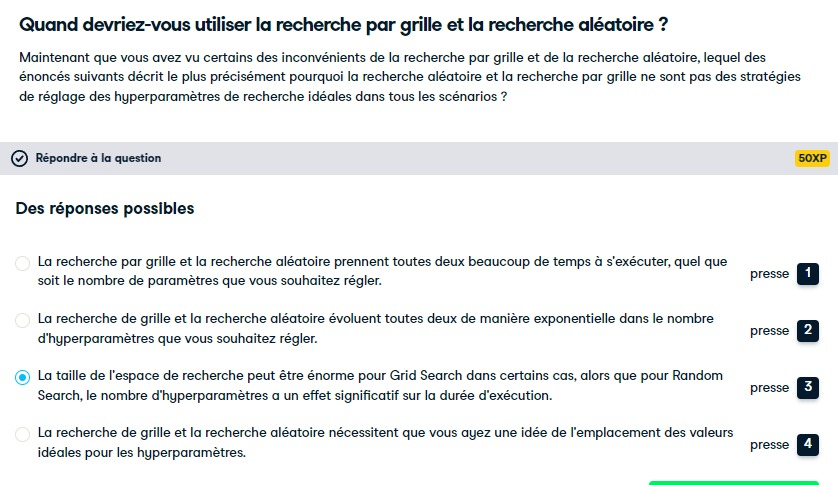

***C'est pourquoi la recherche aléatoire et la recherche par grille ne doivent pas toujours être utilisées. Bon!***


####**1. Examen des pipelines à l'aide de sklearn**

+ ***Commençons le dernier chapitre de ce cours en examinant comment les pipelines sont utilisés dans scikit-learn. Rafraîchir notre mémoire sur le fonctionnement des pipelines nous permettra d'utiliser XGBoost efficacement dans les pipelines à l'avenir. Avant de travailler sur un exemple de script utilisant des pipelines, examinons brièvement leur fonctionnement.***

####**2. Examen du pipeline**

+ ***Les pipelines dans sklearn sont des objets qui prennent une liste de tuples nommés en entrée. Les tuples nommés doivent toujours contenir un nom de chaîne comme premier élément de chaque tuple et tout transformateur ou estimateur compatible scikit-learn comme deuxième élément. Chaque tuple nommé dans le pipeline est appelé une étape et la liste des transformations contenues dans la liste est exécutée dans l'ordre une fois que certaines données sont passées dans le pipeline. Ceci est fait en utilisant le paradigme standard fit/predict qui est standard dans scikit-learn.***

####**3. Exemple de pipeline Scikit-learn**

+ ***Enfin, là où les pipelines sont vraiment utiles, c'est qu'ils peuvent être utilisés comme objets d'estimation d'entrée dans d'autres objets scikit-learn eux-mêmes, dont les plus utiles sont la méthode cross_val_score, qui permet une validation croisée efficace et un calcul de métrique hors échantillon,Maintenant que nous avons parlé du fonctionnement des pipelines, regardons-les en action. Dans cet exemple, nous utiliserons le jeu de données Boston Housing. Comme vous l'avez vu plusieurs fois auparavant, nous importons d'abord toutes les fonctionnalités dont nous aurons besoin pour l'exemple. Nous utiliserons un modèle randomforestregressor pour prédire les prix des logements et importerons un pipeline à partir du sous-module pipeline de sklearn. Aux lignes 2 à 4, nous chargeons nos données et créons notre matrice de caractéristiques X et notre vecteur cible y. Les lignes 5-6 sont celles qui font le vrai travail ici. À la ligne 5, nous créons notre pipeline, qui contient un transformateur d'échelle standard suivi de notre estimateur RandomForestRegressor. La ligne 6 prend l'estimateur de pipeline qui vient d'être créé comme entrée avec notre matrice X et notre vecteur y et effectue une validation croisée de 10 fois en utilisant le pipeline et les données et génère le neg_mean_squared_error comme métrique d'évaluation une fois par pli. En bref, neg_mean_squared_error est la manière spécifique à l'API de scikit-learn de calculer l'erreur quadratique moyenne d'une manière compatible avec l'API. Les erreurs quadratiques moyennes négatives n'existent pas réellement car tous les carrés doivent être positifs lorsque vous travaillez avec des nombres réels.***

####**4. Exemple de pipeline Scikit-learn**
+ ***Ainsi, aux lignes 7 et 8, nous prenons simplement la valeur absolue des scores, prenons chacune de leurs racines carrées et calculons leur moyenne pour obtenir une erreur quadratique moyenne sur les 10 plis de validation croisée. Nous pouvons voir qu'en moyenne, notre prédiction était erronée d'environ 4 points 5 unités.***

####**5. Prétraitement I : LabelEncoder et OneHotEncoder**

+ ***Dans les exercices suivants, étant donné que nous travaillerons avec l'ensemble de données sur le logement d'Ames, qui est plus complexe que l'ensemble de données sur le logement de Boston, quelques étapes de prétraitement supplémentaires seront nécessaires. Plus précisément, nous effectuerons les mêmes étapes de prétraitement de deux manières différentes, dont une seule peut être effectuée dans un pipeline. La première approche consiste à utiliser les classes LabelEncoder et OneHotEncoder du sous-module de prétraitement de scikit-learn l'une après l'autre. LabelEncoder convertit simplement une colonne catégorielle de chaînes en entiers qui correspondent à ces chaînes. OneHotEncoder prend une colonne d'entiers traités comme des valeurs catégorielles et les encode comme des variables factices, que vous connaissez peut-être déjà. Le problème avec cette méthode en 2 étapes, cependant, est qu'elle ne peut pas actuellement être effectuée dans un pipeline***.

####**6. Prétraitement II : DictVectorizer**

+ ***Cependant, tout espoir n'est pas perdu. La deuxième approche, qui implique l'utilisation d'un dict-vectorizer, peut accomplir les deux étapes dans une seule ligne de code. Le DictVectorizer est une classe trouvée dans le sous-module d'extraction de fonctionnalités de scikit-learn, et est traditionnellement utilisé dans les pipelines de traitement de texte en convertissant des listes de mappages de fonctionnalités en vecteurs. En utilisant pandas DataFrames, nous n'avons pas initialement une telle liste, cependant, si nous convertissons explicitement un DataFrame en une liste d'entrées de dictionnaire, nous avons exactement ce dont nous avons besoin. Pour plus de détails sur ces classes, je vous encourage à explorer la documentation de scikit-learn.***

####**7. Construisons des pipelines !**

+ ***Vous utiliserez les deux approches dans les prochains exercices. J'espère que vous vous amuserez à construire des pipelines !***

###**EXERCICES**

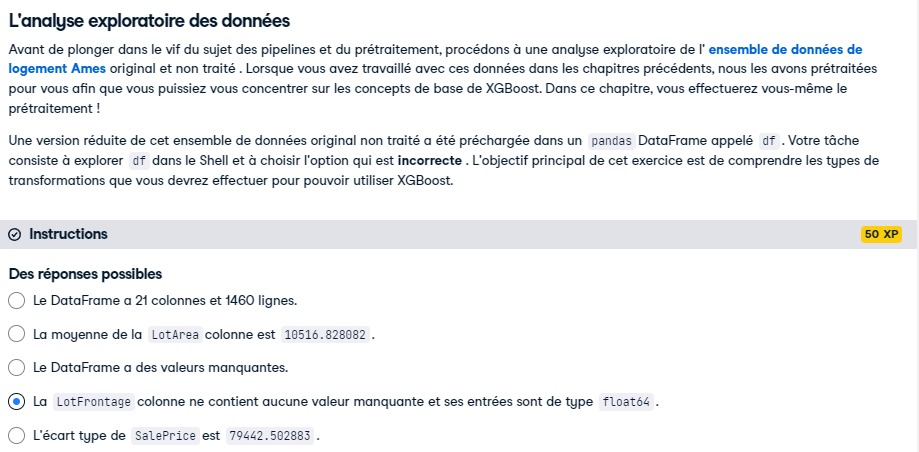

***Bien joué! La LotFrontagecolonne a en fait des valeurs manquantes : 259, pour être précis. De plus, notez que les colonnes telles que MSZoning, PavedDrive et HouseStyle sont catégorielles. Ceux-ci doivent être encodés numériquement avant de pouvoir utiliser XGBoost. C'est ce que vous ferez dans les prochains exercices.***

####**Encodage des colonnes catégorielles I : LabelEncoder**


+ ***Maintenant que vous avez vu ce qui doit être fait pour préparer les données de logement pour XGBoost, passons en revue le processus étape par étape.***

+ ***Tout d'abord, vous devrez remplir les valeurs manquantes - comme vous l'avez vu précédemment, la colonne LotFrontagecontient de nombreuses valeurs manquantes. Ensuite, vous devrez encoder toutes les colonnes catégorielles du jeu de données à l'aide de l'encodage one-hot afin qu'elles soient encodées numériquement. Vous pouvez regarder cette vidéo de l'apprentissage supervisé avec scikit-learn pour un rappel sur l'idée.***

+ *Les données comportent cinq colonnes de catégorie : MSZoning, PavedDrive, Neighborhood, BldgTypeet HouseStyle. Scikit-learn a une fonction LabelEncoder qui convertit les valeurs de chaque colonne catégorielle en nombres entiers. Vous vous exercerez à l'utiliser ici.*

####**Instructions**

+ Importer LabelEncoder depuis sklearn.preprocessing.
+ Remplissez les valeurs manquantes par 0 dans la colonne LotFrontage à l'aide de .fillna().
+ Créez un masque booléen pour les colonnes catégorielles. Vous pouvez le faire en vérifiant si df.dtypes equals object.
+ Créer un LabelEncoderobjet. Vous pouvez le faire de la même manière que vous instanciez n'importe quel estimateur scikit-learn.
+ Encodez toutes les colonnes catégorielles en nombres entiers à l'aide de LabelEncoder().
+ Pour ce faire, utilisez la méthode .fit_transform() de  la fonction lambda fournie.

In [50]:
df = pd.read_csv('ames_unprocessed_data.csv')
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,...,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageArea,PavedDrive,SalePrice
0,60,RL,65.0,8450,CollgCr,1Fam,2Story,7,5,2003,...,1710,1,0,2,1,3,0,548,Y,208500
1,20,RL,80.0,9600,Veenker,1Fam,1Story,6,8,1976,...,1262,0,1,2,0,3,1,460,Y,181500
2,60,RL,68.0,11250,CollgCr,1Fam,2Story,7,5,2001,...,1786,1,0,2,1,3,1,608,Y,223500
3,70,RL,60.0,9550,Crawfor,1Fam,2Story,7,5,1915,...,1717,1,0,1,0,3,1,642,Y,140000
4,60,RL,84.0,14260,NoRidge,1Fam,2Story,8,5,2000,...,2198,1,0,2,1,4,1,836,Y,250000


In [51]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Fill missing values with 0
df.LotFrontage = df.LotFrontage.fillna(0)

# Create a boolean mask for categorical columns
categorical_mask = (df.dtypes == object)

# Get list of categorical column names
categorical_columns = df.columns[categorical_mask].tolist()

# Print the head of the categorical columns
print(df[categorical_columns].head())

  MSZoning Neighborhood BldgType HouseStyle PavedDrive
0       RL      CollgCr     1Fam     2Story          Y
1       RL      Veenker     1Fam     1Story          Y
2       RL      CollgCr     1Fam     2Story          Y
3       RL      Crawfor     1Fam     2Story          Y
4       RL      NoRidge     1Fam     2Story          Y


In [52]:
# Create LabelEncoder object: le
le = LabelEncoder()

# Apply LabelEncoder to categorical columns
df[categorical_columns] = df[categorical_columns].apply(lambda x: le.fit_transform(x))

# Print the head of the LabelEncoded categorical columns
print(df[categorical_columns].head())

   MSZoning  Neighborhood  BldgType  HouseStyle  PavedDrive
0         3             5         0           5           2
1         3            24         0           2           2
2         3             5         0           5           2
3         3             6         0           5           2
4         3            15         0           5           2


***catégorielle sont désormais codées numériquement. Un BldgTpede 1Famest encodé comme 0, tandis qu'un HouseStylede 2Storyest encodé comme 5.***

####**Encodage des colonnes catégorielles II : OneHotEncoder**

+ ***D'accord - vous avez donc vos colonnes catégorielles encodées numériquement. Pouvez-vous maintenant passer à l'utilisation des pipelines et de XGBoost ? Pas encore! Dans les colonnes catégorielles de cet ensemble de données, il n'y a pas d'ordre naturel entre les entrées. Par exemple : en utilisant LabelEncoder, le CollgCr Neighborhooda été encodé en tant que 5, tandis que le Veenker Neighborhooda été encodé en tant que 24, et Crawforen tant que 6. Est-ce que Veenker"plus grand" que Crawforet CollgCr? Non - et permettre au modèle de supposer cet ordre naturel peut entraîner des performances médiocres.***

+ *Par conséquent, une autre étape est nécessaire : vous devez appliquer un encodage one-hot pour créer des variables binaires ou "fictives". Vous pouvez le faire en utilisant OneHotEncoder de scikit-learn .*

####**Instructions**

+ Importer OneHotEncoder depuis sklearn.preprocessing.
+ Instanciez un objet OneHotEncoder appelé ohe.
+ Spécifiez l'argument du mot-clé sparse=False.
+ En utilisant sa méthode .fit_transform(), appliquez le OneHotEncoderà dfet enregistrez le résultat sous df_encoded. La sortie sera un tableau NumPy.
+ Imprimez les 5 premières lignes de df_encoded, puis la forme de df ainsi que df_encoded pour comparer la différence.



In [53]:
# Import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

# Create OneHotEncoder: ohe
ohe = OneHotEncoder(sparse_output=False)

# Apply OneHotEncoder to categorical columns - output is no longer a dataframe: df_encoded
df_encoded = ohe.fit_transform(df)

# Print first 5 rows of the resulting dataset - again, this will no longer be a pandas dataframe
print(df_encoded[:5, :])

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [54]:
# Print the shape of the original DataFrame
print(df.shape)

(1460, 21)


In [55]:
# Print the shape of the transformed array
print(df_encoded.shape)

(1460, 3369)


***Superbe! Comme vous pouvez le voir, après un encodage à chaud, qui crée des variables binaires à partir des variables catégorielles, il y a maintenant 62 colonnes.***

####**Encodage des colonnes catégorielles III : DictVectorizer**

+ ***D'accord, une dernière astuce avant de plonger dans les pipelines. Le processus en deux étapes que vous venez de suivre - LabelEncodersuivi de OneHotEncoder- peut être simplifié en utilisant un [DictVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html).***

+ ***L'utilisation d'un DictVectorizersur un DataFrame qui a été converti en dictionnaire vous permet d'obtenir un encodage d'étiquette ainsi qu'un encodage à chaud en une seule fois.***

+ *Votre tâche est de travailler cette stratégie dans cet exercice !*

####**Instructions**

Importer DictVectorizer depuis sklearn.feature_extraction.
+ Convertir df en un dictionnaire appelé df_dict en utilisant sa méthode .to_dict() avec "records"comme argument.
+ Instancie un objet DictVectorizer appelé dv avec le mot-clé argument sparse=False.
+ Appliquez le DictVectorizersur df_dicten utilisant sa méthode .fit_transform().
+ Appuyez sur "Soumettre la réponse" pour imprimer les cinq premières lignes résultantes et le vocabulaire.

In [56]:
# Import DictVectorizer
from sklearn.feature_extraction import DictVectorizer

# Convert df into a dictionary: df_dict
df_dict = df.to_dict(orient="records")

# Create the DictVectorizer object: dv
dv = DictVectorizer(sparse=False)

# Apply dv on df: df_encoded
df_encoded = dv.fit_transform(df_dict)

# Print the resulting first five rows
print(df_encoded[:5,:])

[[3.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 2.000e+00 5.480e+02
  1.710e+03 1.000e+00 5.000e+00 8.450e+03 6.500e+01 6.000e+01 3.000e+00
  5.000e+00 5.000e+00 7.000e+00 2.000e+00 0.000e+00 2.085e+05 2.003e+03]
 [3.000e+00 0.000e+00 0.000e+00 1.000e+00 1.000e+00 2.000e+00 4.600e+02
  1.262e+03 0.000e+00 2.000e+00 9.600e+03 8.000e+01 2.000e+01 3.000e+00
  2.400e+01 8.000e+00 6.000e+00 2.000e+00 0.000e+00 1.815e+05 1.976e+03]
 [3.000e+00 0.000e+00 1.000e+00 0.000e+00 1.000e+00 2.000e+00 6.080e+02
  1.786e+03 1.000e+00 5.000e+00 1.125e+04 6.800e+01 6.000e+01 3.000e+00
  5.000e+00 5.000e+00 7.000e+00 2.000e+00 1.000e+00 2.235e+05 2.001e+03]
 [3.000e+00 0.000e+00 1.000e+00 0.000e+00 1.000e+00 1.000e+00 6.420e+02
  1.717e+03 0.000e+00 5.000e+00 9.550e+03 6.000e+01 7.000e+01 3.000e+00
  6.000e+00 5.000e+00 7.000e+00 2.000e+00 1.000e+00 1.400e+05 1.915e+03]
 [4.000e+00 0.000e+00 1.000e+00 0.000e+00 1.000e+00 2.000e+00 8.360e+02
  2.198e+03 1.000e+00 5.000e+00 1.426e+04 8.400e+01 6.000e+0

In [57]:
# Print the vocabulary
print(dv.vocabulary_)

{'MSSubClass': 12, 'MSZoning': 13, 'LotFrontage': 11, 'LotArea': 10, 'Neighborhood': 14, 'BldgType': 1, 'HouseStyle': 9, 'OverallQual': 16, 'OverallCond': 15, 'YearBuilt': 20, 'Remodeled': 18, 'GrLivArea': 7, 'BsmtFullBath': 2, 'BsmtHalfBath': 3, 'FullBath': 5, 'HalfBath': 8, 'BedroomAbvGr': 0, 'Fireplaces': 4, 'GarageArea': 6, 'PavedDrive': 17, 'SalePrice': 19}


***Fantastique! En plus de simplifier le processus en une seule étape, DictVectorizerpossède des attributs utiles tels que vocabulary_mapper les noms des entités à leurs indices. Avec les données prétraitées, il est temps de passer aux pipelines !***

####**Prétraitement dans un pipeline**
+ ***Maintenant que vous avez vu quelles mesures doivent être prises individuellement pour traiter correctement les données de logement d'Ames, utilisons l'approche DictVectorizer beaucoup plus propre et plus succincte et mettons-la à côté XGBoostRegressor d'un pipeline scikit-learn.***

####**Instructions**

+ Importer DictVectorizer depuis sklearn.feature_extraction et Pipeline depuis sklearn.pipeline.
+ Complétez toutes les valeurs manquantes dans la LotFrontagecolonne de $X$ avec 0.
+ Complétez les étapes du pipeline avec DictVectorizer(sparse=False)for "ohe_onestep"et xgb.XGBRegressor()for "xgb_model".
+ Créez le pipeline à l'aide Pipeline()de et steps.
Monter le Pipeline. N'oubliez pas de convertir $X$ dans un format qui DictVectorizercomprend en appelant la méthode to_dict("records") sur $X$.

In [58]:
# Import necessary modules
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import Pipeline

# Fill LotFrontage missing values with 0
X.LotFrontage = X.LotFrontage.fillna(0)

# Setup the pipeline steps: steps
steps = [("ohe_onestep", DictVectorizer(sparse=False)),
         ("xgb_model", xgb.XGBRegressor())]

# Create the pipeline: xgb_pipeline
xgb_pipeline = Pipeline(steps)

# Fit the pipeline
xgb_pipeline.fit(X.to_dict("records"), y)

Pipeline(steps=[('ohe_onestep', DictVectorizer(sparse=False)),
                ('xgb_model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...))])

***Bien joué! Il est maintenant temps de voir ce qu'il faut pour utiliser XGBoost dans les pipelines.***

####**1. Intégrer xgboost dans les pipelines**

+ ***Maintenant que vous vous êtes familiarisé avec les pipelines dans scikit-learn, voyons ce qu'il faut pour utiliser xgboost dans les pipelines.***

####**2. Exemple de pipeline Scikit-learn avec XGBoost**

+ ***Cet exemple est très similaire à ce qui a été montré dans l'examen du pipeline qui a commencé ce chapitre. Pour que XGBoost fonctionne dans un pipeline, tout ce qui est vraiment nécessaire est que vous utilisiez l'API scikit-learn de XGBoost dans un objet pipeline. Voyons à quoi cela ressemble en pratique. Comme toujours, nous importons d'abord tout ce dont nous avons besoin pour nos besoins. Nous procédons ensuite au chargement de l'ensemble de données et à son analyse dans la matrice des caractéristiques X et du vecteur cible y. À ce stade, réside la seule différence entre l'utilisation d'un modèle d'apprentissage automatique natif scikit-learn et XGBoost. Plus précisément, nous passons simplement une instance de l'objet XGBoost XGBRegressor dans le pipeline où se trouverait un estimateur scikit-learn normal. Le reste du script est exactement ce que vous avez vu dans le passé. Vous calculez la MSE négative validée croisée à l'aide d'une validation croisée de 10 fois, puis convertissez la MSE négative de 10 fois en une RMSE moyenne sur les 10 fois. Comme vous pouvez le voir, sans aucun réglage d'hyperparamètre, le modèle XGBoost avait un RMSE inférieur, d'environ 4 points-03 unités, que le modèle randomforest avec lequel nous avons commencé le chapitre, qui avait un RMSE d'environ 4-point-5.***

####**3. Composants supplémentaires introduits pour les pipelines**

+ ***Nous voulions que vous voyiez comment fonctionne un cas simple de pipelining avec XGBoost, cependant, dans l'exemple final de bout en bout, nous prendrons un ensemble de données qui implique beaucoup plus de querelles avant de pouvoir l'utiliser avec XGBoost et de le faire passer par un pipeline aussi. En conséquence, nous devrons travailler avec une bibliothèque qui ne fait pas partie de la suite standard d'outils scikit-learn, ainsi qu'avec des parties de pipelines que vous ne connaissez peut-être pas. Sklearn_pandas est une bibliothèque distincte qui tente de combler le fossé entre le travail avec les pandas et le travail avec scikit-learn, car ils ne fonctionnent pas toujours de manière transparente ensemble. Plus précisément, sklearn_pandas a une classe générique appelée DataFrameMapper, qui permet une conversion facile entre des objets conscients de scikit-learn, ou des tableaux numpy purs, et les DataFrames qui sont le pain et le beurre de la bibliothèque pandas. Nous utiliserons également certains aspects inhabituels de scikit-learn pour atteindre nos objectifs. Plus précisément, nous utiliserons la classe SimpleImputer du sous-module impute de scikit-learn, qui nous permet de remplir les valeurs numériques et catégorielles manquantes, et la classe FeatureUnion trouvée dans le sous-module pipeline de scikit-learn. La classe FeatureUnion nous permet de combiner des sorties de pipeline distinctes en une seule sortie de pipeline, comme par exemple, nous aurions besoin de le faire si nous avions un ensemble d'étapes de prétraitement dont nous avions besoin pour effectuer les caractéristiques catégorielles d'un ensemble de données et un ensemble distinct d'étapes de prétraitement. étapes sur les entités numériques trouvées dans un jeu de données. Le fait est que nous présenterons ces sujets immédiatement, mais ne voulez pas que vous vous sentiez submergé par ce qu'ils font et comment ils peuvent être utilisés correctement. nous utiliserons la classe SimpleImputer du sous-module impute de scikit-learn, qui nous permet de remplir les valeurs numériques et catégorielles manquantes, et la classe FeatureUnion trouvée dans le sous-module pipeline de scikit-learn. La classe FeatureUnion nous permet de combiner des sorties de pipeline distinctes en une seule sortie de pipeline, comme par exemple, nous aurions besoin de le faire si nous avions un ensemble d'étapes de prétraitement dont nous avions besoin pour effectuer les caractéristiques catégorielles d'un ensemble de données et un ensemble distinct d'étapes de prétraitement. étapes sur les entités numériques trouvées dans un jeu de données. Le fait est que nous présenterons ces sujets immédiatement, mais ne voulez pas que vous vous sentiez submergé par ce qu'ils font et comment ils peuvent être utilisés correctement. nous utiliserons la classe SimpleImputer du sous-module impute de scikit-learn, qui nous permet de remplir les valeurs numériques et catégorielles manquantes, et la classe FeatureUnion trouvée dans le sous-module pipeline de scikit-learn. La classe FeatureUnion nous permet de combiner des sorties de pipeline distinctes en une seule sortie de pipeline, comme par exemple, nous aurions besoin de le faire si nous avions un ensemble d'étapes de prétraitement dont nous avions besoin pour effectuer les caractéristiques catégorielles d'un ensemble de données et un ensemble distinct d'étapes de prétraitement. étapes sur les entités numériques trouvées dans un jeu de données. Le fait est que nous présenterons ces sujets immédiatement, mais ne voulez pas que vous vous sentiez submergé par ce qu'ils font et comment ils peuvent être utilisés correctement. et la classe FeatureUnion trouvée dans le sous-module de pipeline de scikit-learn. La classe FeatureUnion nous permet de combiner des sorties de pipeline distinctes en une seule sortie de pipeline, comme par exemple, nous aurions besoin de le faire si nous avions un ensemble d'étapes de prétraitement dont nous avions besoin pour effectuer les caractéristiques catégorielles d'un ensemble de données et un ensemble distinct d'étapes de prétraitement. étapes sur les entités numériques trouvées dans un jeu de données. Le fait est que nous présenterons ces sujets immédiatement, mais ne voulez pas que vous vous sentiez submergé par ce qu'ils font et comment ils peuvent être utilisés correctement. et la classe FeatureUnion trouvée dans le sous-module de pipeline de scikit-learn. La classe FeatureUnion nous permet de combiner des sorties de pipeline distinctes en une seule sortie de pipeline, comme par exemple, nous aurions besoin de le faire si nous avions un ensemble d'étapes de prétraitement dont nous avions besoin pour effectuer les caractéristiques catégorielles d'un ensemble de données et un ensemble distinct d'étapes de prétraitement. étapes sur les entités numériques trouvées dans un jeu de données. Le fait est que nous présenterons ces sujets immédiatement, mais ne voulez pas que vous vous sentiez submergé par ce qu'ils font et comment ils peuvent être utilisés correctement. nous aurions besoin de faire si nous avions un ensemble d'étapes de prétraitement que nous devions effectuer sur les caractéristiques catégorielles d'un ensemble de données et un ensemble distinct d'étapes de prétraitement sur les caractéristiques numériques trouvées dans un ensemble de données. Le fait est que nous présenterons ces sujets immédiatement, mais ne voulez pas que vous vous sentiez submergé par ce qu'ils font et comment ils peuvent être utilisés correctement. nous aurions besoin de faire si nous avions un ensemble d'étapes de prétraitement que nous devions effectuer sur les caractéristiques catégorielles d'un ensemble de données et un ensemble distinct d'étapes de prétraitement sur les caractéristiques numériques trouvées dans un ensemble de données. Le fait est que nous présenterons ces sujets immédiatement, mais ne voulez pas que vous vous sentiez submergé par ce qu'ils font et comment ils peuvent être utilisés correctement.***

####**4. Entraînons-nous !**

+ ***En vous présentant ces sujets, j'espère vous donner un aperçu de ce qu'implique souvent le prétraitement des données dans le monde réel, mais je ne veux pas que vous vous sentiez submergé. J'espère que vous venez de voir qu'il n'est pas particulièrement difficile d'intégrer XGBoost dans les pipelines. Maintenant, c'est à vous de mettre en pratique ce que vous venez d'apprendre !***

###**EXERCICES**
####**Validation croisée de votre modèle XGBoost**
+ ***Dans cet exercice, vous irez plus loin en utilisant le pipeline que vous avez créé pour prétraiter et valider votre modèle.***

####**Instructions**

+ Créez un pipeline appelé xgb_pipeline à l'aide de steps.
+ Effectuez une validation croisée 10 fois à l'aide de cross_val_score(). Vous devrez passer dans le pipeline, $X$(comme un dictionnaire, en utilisant .to_dict("records")), $y$, le nombre de plis que vous souhaitez utiliser, et scoring( "neg_mean_squared_error").
+ Imprimez le RMSE de 10 fois.

In [59]:
# Import necessary modules
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

# Fill LotFrontage missing values with 0
X.LotFrontage = X.LotFrontage.fillna(0)

# Setup the pipeline steps: steps
steps = [("ohe_onestep", DictVectorizer(sparse=False)),
         ("xgb_model", xgb.XGBRegressor(max_depth=2, objective="reg:squarederror"))]

# Create the pipeline: xgb_pipeline
xgb_pipeline = Pipeline(steps)

# Cross-validate the model
cross_val_scores = cross_val_score(xgb_pipeline, X.to_dict("records"), y, scoring="neg_mean_squared_error", cv=10)

# Print the 10-fold RMSE
print("10-fold RMSE: ", np.mean(np.sqrt(np.abs(cross_val_scores))))

10-fold RMSE:  27840.01103862237


####**Étude de cas sur la maladie rénale I : Imputer catégorique**
+ ***Vous allez maintenant poursuivre votre exploration de l'utilisation des pipelines avec un jeu de données qui nécessite beaucoup plus de manipulations. L' ensemble de données sur les maladies rénales chroniques contient à la fois des caractéristiques catégorielles et numériques, mais contient de nombreuses valeurs manquantes. L'objectif ici est de prédire qui a une maladie rénale chronique en fonction de divers indicateurs sanguins.***

+ ***Comme Sergey l'a mentionné dans la vidéo, vous découvrirez une nouvelle bibliothèque, sklearn_pandasqui vous permet d'enchaîner beaucoup plus d'étapes de traitement à l'intérieur d'un pipeline que celles actuellement prises en charge dans scikit-learn. Plus précisément, vous pourrez utiliser la DataFrameMapper()classe pour appliquer n'importe quel transformateur arbitraire compatible avec sklearn sur des colonnes DataFrame, où la sortie résultante peut être soit un tableau NumPy, soit DataFrame.***

+ ***Nous avons également créé un transformateur appelé a Dictifier qui encapsule la conversion d'un DataFrame en utilisant .to_dict("records")sans que vous ayez à le faire explicitement (et pour qu'il fonctionne dans un pipeline). Enfin, nous avons également fourni la liste des noms de fonctionnalités dans kidney_feature_names, le nom de la cible dans kidney_target_name, les fonctionnalités dans Xet la cible dans y.***

+ ***Dans cet exercice, votre tâche consiste à appliquer sklearn SimpleImputerpour imputer toutes les colonnes catégorielles de l'ensemble de données. Vous pouvez vous référer à la façon dont le mappeur d'imputation numérique a été créé en tant que modèle. Remarquez les arguments de mots-clés input_df=Trueet df_out=True? C'est pour que vous puissiez travailler avec des DataFrames au lieu de tableaux. Par défaut, les transformateurs reçoivent un numpytableau des colonnes sélectionnées en entrée et, par conséquent, la sortie du mappeur DataFrame est également un tableau. Les transformateurs Scikit-learn ont toujours été conçus pour fonctionner avec numpydes tableaux, pas pandasdes DataFrames, même si leurs interfaces d'indexation de base sont similaires.***

####**Instructions**

+ Appliquez l'imputation catégorielle à l'aide de DataFrameMapper() et SimpleImputer().
+ SimpleImputer() n'a pas besoin d'arguments à transmettre.
+ Les colonnes sont contenues dans categorical_columns.
+ Assurez-vous de spécifier input_df=True et df_out=True, et utilisez category_feature-les comme variable d'itérateur dans la compréhension de la liste.

In [ ]:
!pip install sklearn-pandas==1.5.0

In [60]:
X = pd.read_csv('chronic_kidney_X.csv')
y = pd.read_csv('chronic_kidney_y.csv').to_numpy().ravel()

In [61]:
# Import necessary modules
from sklearn_pandas import DataFrameMapper
from sklearn_pandas import CategoricalImputer
from sklearn.impute import SimpleImputer

In [62]:
# Check number of nulls in each feature column
nulls_per_column = X.isnull().sum()
print(nulls_per_column)

age        9
bp        12
sg        47
al        46
su        49
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wc       106
rc       131
rbc      152
pc        65
pcc        4
ba         4
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
dtype: int64


In [63]:
# Create a boolean mask for categorical columns
categorical_feature_mask = X.dtypes == object

# Get list of categorical column names
categorical_columns = X.columns[categorical_feature_mask].tolist()

# Get list of non-categorical column names
non_categorical_columns = X.columns[~categorical_feature_mask].tolist()

In [64]:
# Apply numeric imputer
numeric_imputation_mapper = DataFrameMapper(
                                            [([numeric_feature], SimpleImputer(strategy="median")) for numeric_feature in non_categorical_columns],
                                            input_df=True,
                                            df_out=True
                                           )

# Apply categorical imputer
categorical_imputation_mapper = DataFrameMapper(
                                                [(category_feature, CategoricalImputer()) for category_feature in categorical_columns],
                                                input_df=True,
                                                df_out=True
                                               )

####**OU**

In [ ]:
# Import necessary modules
from sklearn_pandas import DataFrameMapper
from sklearn.impute import SimpleImputer

# Check number of nulls in each feature column
nulls_per_column = X.isnull().sum()
print(nulls_per_column)

# Create a boolean mask for categorical columns
categorical_feature_mask = X.dtypes == object

# Get list of categorical column names
categorical_columns = X.columns[categorical_feature_mask].tolist()

# Get list of non-categorical column names
non_categorical_columns = X.columns[~categorical_feature_mask].tolist()

# Apply numeric imputer
numeric_imputation_mapper = DataFrameMapper(
                                            [([numeric_feature],SimpleImputer(strategy="median")) for numeric_feature in non_categorical_columns],
                                            input_df=True,
                                            df_out=True
                                           )

# Apply categorical imputer
categorical_imputation_mapper = DataFrameMapper(
                                                [(categorical_columns, SimpleImputer(strategy='most_frequent'))],
                                                input_df=True,
                                                df_out=True
                                               )

####**Étude de cas II sur la maladie rénale : Feature Union***
+ ***Après avoir imputé séparément des colonnes numériques et catégorielles, votre tâche consiste maintenant à utiliser FeatureUnion de scikit-learn pour concaténer leurs résultats, qui sont contenus dans deux objets transformateurs distincts - numeric_imputation_mapper, et categorical_imputation_mapper, respectivement.***

+ *Vous avez peut-être déjà rencontré FeatureUnion dans Machine Learning with the Experts : School Budgets . Tout comme avec les pipelines, vous devez lui transmettre une liste de (string, transformer)tuples, où la première moitié de chaque tuple est le nom du transformateur.*

####**Instructions**

+ Importer FeatureUnion depuis sklearn.pipeline.
+ Combinez les résultats de numeric_imputation_mapperet categorical_imputation_mapperen utilisant FeatureUnion(), avec les noms "num_mapper"et "cat_mapper"respectivement.

In [65]:
# Import FeatureUnion
from sklearn.pipeline import FeatureUnion

# Combine the numeric and categorical transformations
numeric_categorical_union = FeatureUnion([
                                          ("num_mapper", numeric_imputation_mapper),
                                          ("cat_mapper", categorical_imputation_mapper)
                                         ])

####**Étude de cas III sur la maladie rénale : pipeline complet**
+ ***Il est temps de reconstituer toutes les transformations avec un XGBClassifierpour construire le pipeline complet !***

+ ***En plus de celui numeric_categorical_unionque vous avez créé dans l'exercice précédent, deux autres transformations sont nécessaires : la Dictifier()transformation que nous avons créée pour vous et la transformation DictVectorizer().***

+ *Après avoir créé le pipeline, votre tâche consiste à le valider de manière croisée pour voir ses performances.*

####**Instructions**

+ Créez le pipeline à l'aide des transformations numeric_categorical_union, Dictifier() et DictVectorizer(sort=False), et xgb.XGBClassifier() de l'estimateur avec max_depth=3.

+ Nommez les transformées "featureunion", "dictifier" "vectorizer"et l'estimateur "clf".
+ Effectuez une triple validation croisée sur l'utilisation pipeline de cross_val_score().
+ Passez-lui le pipeline, pipeline, les fonctionnalités, kidney_data, les résultats, $y$.
+ Réglez également scoring sur "roc_auc" et cv sur 3.

In [66]:
from sklearn.base import BaseEstimator, TransformerMixin

# Define Dictifier class to turn df into dictionary as part of pipeline
class Dictifier(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if type(X) == pd.core.frame.DataFrame:
            return X.to_dict("records")
        else:
            return pd.DataFrame(X).to_dict("records")

In [67]:
# Create full pipeline
pipeline = Pipeline([
    ("featureunion", numeric_categorical_union),
    ("dictifier", Dictifier()),
    ("vectorizer", DictVectorizer(sort=False)),
    ("clf", xgb.XGBClassifier(max_depth=3))
])

# Perform cross-validation
cross_val_scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=3)

# Print avg. AUC
print("3-fold AUC: ", np.mean(cross_val_scores))

3-fold AUC:  0.998237712755785


####**1. Réglage des hyperparamètres xgboost dans un pipeline**

+ ***Nous allons terminer ce chapitre, et le cours, en voyant comment le réglage automatisé des hyperparamètres pour un modèle XGBoost fonctionne dans un pipeline scikit-learn. Une fois que vous aurez compris cela, vous pourrez créer certains des modèles d'apprentissage automatique les plus puissants et les mieux réglés aujourd'hui de manière automatisée et reproductible.***

####**2. Réglage des hyperparamètres XGBoost dans un pipeline**

+ ***Nous utiliserons à nouveau l'ensemble de données sur le logement de Boston pour motiver notre utilisation des pipelines et du réglage des hyperparamètres. Comme toujours, nous importons d'abord ce que nous allons utiliser. La seule différence est maintenant que nous importons également RandomizedSearchCV à partir du sous-module de sélection de modèles scikit-learn. Nous chargeons ensuite nos données et créons notre matrice de caractéristiques X et notre vecteur cible y et créons également notre pipeline qui inclut à la fois l'étape de mise à l'échelle standard et un objet xgboostregressor de base avec tous les paramètres par défaut. À ce stade, vous devez créer la grille de paramètres sur laquelle vous effectuerez la recherche. Pour que les hyperparamètres soient transmis à l'étape appropriée, vous devez nommer les paramètres dans le dictionnaire avec le nom de l'étape référencée suivi de 2 signes de soulignement, puis du nom de l'hyperparamètre sur lequel vous souhaitez itérer. Étant donné que l'étape xgboost s'appelle xgb_model, toutes nos clés d'hyperparamètre commenceront par xgboost_model__. Dans l'exemple, nous allons régler subsample, max_depth et colsample_bytree, et donner à chaque paramètre une plage de valeurs possibles. Nous passons ensuite le pipeline en tant qu'estimateur à RandomizedSearchCV et la grille de paramètres à param_distributions. Tout le reste est comme vous l'avez vu auparavant, avec des paramètres de notation et de validation croisée appropriés également transmis. Une fois cela fait, tout ce que vous avez à faire est d'adapter l'objet de recherche aléatoire et de transmettre les objets X et y que nous avons créés précédemment. Nous passons ensuite le pipeline en tant qu'estimateur à RandomizedSearchCV et la grille de paramètres à param_distributions. Tout le reste est comme vous l'avez vu auparavant, avec des paramètres de notation et de validation croisée appropriés également transmis. Une fois cela fait, tout ce que vous avez à faire est d'adapter l'objet de recherche aléatoire et de transmettre les objets X et y que nous avons créés précédemment. Nous passons ensuite le pipeline en tant qu'estimateur à RandomizedSearchCV et la grille de paramètres à param_distributions. Tout le reste est comme vous l'avez vu auparavant, avec des paramètres de notation et de validation croisée appropriés également transmis. Une fois cela fait, tout ce que vous avez à faire est d'adapter l'objet de recherche aléatoire et de transmettre les objets X et y que nous avons créés précédemment.***

####**3. Réglage des hyperparamètres XGBoost dans un pipeline II**

+ ***Enfin, une fois que vous avez ajusté l'objet randomizedsearchcv, vous pouvez inspecter le meilleur score qu'il a trouvé et le convertir en RMSE. Vous pouvez également inspecter quel était le meilleur modèle trouvé et l'imprimer à l'écran.***

####**4. Finissons-en !**

+ ***Ok, dernier exercice de codage du cours, finissons-en !***

###**EXERCICES**
####**Rassembler le tout**
+ ***Très bien, il est temps de rassembler tout ce que vous avez appris jusqu'à présent ! Dans ce dernier exercice du cours, vous combinerez votre travail des exercices précédents dans un pipeline XGBoost de bout en bout pour vraiment cimenter votre compréhension du prétraitement et des pipelines dans XGBoost.***

+ *Votre travail des 3 exercices précédents, où vous avez prétraité les données et configuré votre pipeline, a été préchargé. Votre travail consiste à effectuer une recherche aléatoire et à identifier les meilleurs hyperparamètres.*

####**Instructions**

+ Configurez la grille de paramètres pour régler
  + 'clf__learning_rate'(de 0.05 à par 1incréments de 0.05),
  + 'clf__max_depth'(de 3 à par 10 incréments de 1)

  + 'clf__n_estimators'(de 50à par 200incréments de 50).


+ En utilisant votre pipeline comme estimateur, effectuez 2 fois RandomizedSearchCVavec un n_iterde 2.
+ Utilisez "roc_auc"-le comme métrique et définissez verbose-le 1pour que la sortie soit plus détaillée.
+ Enregistrez le résultat dans randomized_roc_auc.
+ Ajuster randomized_roc_auc à $X$ et $y$.
+ Calculer le meilleur score et le meilleur estimateur de randomized_roc_auc.

In [68]:
# Create the parameter grid
gbm_param_grid = {
    'clf__learning_rate': np.arange(0.05, 1, 0.05),
    'clf__max_depth': np.arange(3, 10, 1),
    'clf__n_estimators': np.arange(50, 200, 50)
}

# Perform RandomizedSearchCV
randomized_roc_auc = RandomizedSearchCV(estimator = pipeline, param_distributions=gbm_param_grid,n_iter=2,  scoring="roc_auc", verbose=1, cv=2)

# Fit the estimator
randomized_roc_auc.fit(X,y)

Fitting 2 folds for each of 2 candidates, totalling 4 fits


RandomizedSearchCV(cv=2,
                   estimator=Pipeline(steps=[('featureunion',
                                              FeatureUnion(transformer_list=[('num_mapper',
                                                                              DataFrameMapper(df_out=True,
                                                                                              features=[(['age'],
                                                                                                         SimpleImputer(strategy='median')),
                                                                                                        (['bp'],
                                                                                                         SimpleImputer(strategy='median')),
                                                                                                        (['sg'],
                                                                                                         SimpleImputer(strategy='median')),
                                                                                                        (['al'],
                                                                                                         SimpleImputer(strategy='median')),
                                                                                                        (['su'],
                                                                                                         SimpleImputer(strategy='...
                                                            monotone_constraints=None,
                                                            n_estimators=100,
                                                            n_jobs=None,
                                                            num_parallel_tree=None,
                                                            predictor=None,
                                                            random_state=None, ...))]),
                   n_iter=2,
                   param_distributions={'clf__learning_rate': array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
                                        'clf__max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                                        'clf__n_estimators': array([ 50, 100, 150])},
                   scoring='roc_auc', verbose=1)

In [69]:
# Compute metrics
print(randomized_roc_auc.best_score_)

0.9969066666666666


In [70]:
print(randomized_roc_auc.best_estimator_)

Pipeline(steps=[('featureunion',
                 FeatureUnion(transformer_list=[('num_mapper',
                                                 DataFrameMapper(df_out=True,
                                                                 features=[(['age'],
                                                                            SimpleImputer(strategy='median')),
                                                                           (['bp'],
                                                                            SimpleImputer(strategy='median')),
                                                                           (['sg'],
                                                                            SimpleImputer(strategy='median')),
                                                                           (['al'],
                                                                            SimpleImputer(strategy='median')),
                                             

***Excellent travail! Ce type de pipelining est très courant dans la science des données du monde réel et vous êtes sur la bonne voie pour le maîtriser.***

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

df = pd.read_csv('ames_unprocessed_data.csv')

# Fill missing values with 0
df.LotFrontage = df.LotFrontage.fillna(0)

# Create a boolean mask for categorical columns
categorical_mask = (df.dtypes == 'object')

# Get list of categorical columns names
categorical_columns = df.columns[categorical_mask].tolist()

# Generate unique list of each categorical columns
unique_list = [df[c].unique().tolist() for c in categorical_columns]

# Create OneHotEncoder: ohe
ohe = OneHotEncoder(categories=unique_list)

# Create preprocess object for onehotencoding
preprocess = make_column_transformer(
    (ohe, categorical_columns),
    ('passthrough', categorical_mask[~categorical_mask].index.tolist())
)

In [ ]:
# Print first 5 rows of the resulting dataset - again, this will no longer be a pandas dataframe
print(df_encoded[:5, :])

In [ ]:
# Print the shape of the original DataFrame
print(df.shape)

In [ ]:
# Print the shape of the transformed array
print(df_encoded.shape)